# Danone Challenge 2023 - Clasificación de productos de Danone con base en el Grado de Puntuación Ecológica

* Nombre: Claudio Javier Collado
* Email: cjccollado@gmail.com
* LinkedIn: https://www.linkedin.com/in/claudio-collado/

### **Objetivo:** Crear un modelo de aprendizaje automático que clasifique con precisión los productos de Danone según su grado de puntuación ecológica

**Metrica de evluacion: F1 Score**

**Datos**

* name: Nombre del producto
* brand: nombre de la marca, o nombres de la submarca y marca
* generic_name: nombre genérico del producto, si lo hay
* categories_hierarchy: lista ordenada jerárquicamente de categorías y subcategorías para el producto
* is_beverage: indica si el producto es una bebida o no
* selling_countries: lista de países donde se vende el producto
* ingredient_origins: diccionario con regiones como claves y porcentaje de ingredientes provenientes de estas regiones como valores.
* ingredients: listado de ingredientes con sus atributos opcionales, ordenados por rango u orden de aparición en la etiqueta del envase. Cada ingrediente puede tener los siguientes subcampos:
* has_sub_ingredients: Indica si el ingrediente es un subingrediente del ingrediente completo anterior (el que tiene el rango más bajo que se encuentra antes de este sub_ingrediente).
* ciqual_food_code: código del ingrediente en la base de datos francesa de composición de alimentos CIQUAL.
* id: identificador del ingrediente/nombre del ingrediente.
* percent: porcentaje del ingrediente que se encuentra en el producto, si se indica en el empaque.
* percent_estimate: estimación del porcentaje del ingrediente que se encuentra en el producto. Si el porcentaje se indica en el envase, entonces este valor es el mismo que "porcentaje".
* percent_max: estimación del porcentaje máximo del ingrediente que se encuentra en el producto. Si el porcentaje se indica en el envase, entonces este valor es el mismo que "porcentaje".
* percent_min: estimación del porcentaje mínimo del ingrediente que se encuentra en el producto. Si el porcentaje se indica en el envase, entonces este valor es el mismo que "porcentaje".
* rank: indica el orden del ingrediente en la etiqueta del empaque. Un rango más alto indica que el ingrediente está más presente en ese producto que otros ingredientes con rangos más bajos.
* text: cadena de texto que se encuentra en la etiqueta del empaque del producto.
* vegan: indica si el ingrediente es apto para veganos.
* vegetarian: indica si el ingrediente es apto para vegetarianos.
* additives_count: número de ingredientes aditivos encontrados en el producto.
* calcium_100g: gramos de calcio encontrados por 100g de producto.
* carbohydrates_100g: gramos de carbohidratos encontrados por 100g de producto.
* energy_kcal_100g: kcal de energía obtenida por 100g de producto.
* fat_100g: gramos de grasa encontrados por 100g de producto.
* fiber_100g: gramos de fibra encontrados por 100g de producto.
* proteins_100g: gramos de proteína encontrados por 100g de producto.
* salt_100g: gramos de sal encontrados por 100g de producto.
* sodium_100g: gramos de sodio encontrados por 100g de producto.
* sugars_100g: gramos de azúcar encontrados por 100g de producto.
* nutrition_grade: grado de la puntuación nutricional del producto.
* packaging_materials: lista de materiales que se encuentran en el embalaje del producto.
* non_recyclable_and_non_biodegradable_materials_count: número de materiales de embalaje no reciclables y no biodegradables
* est_co2_agriculture: emisiones de CO2eq estimadas generadas en el proceso agrícola necesario para crear el producto
* est_co2_consum: emisiones estimadas de CO2eq generadas en el proceso de consumo del producto
* est_co2_distribution: emisiones estimadas de CO2eq generadas en el proceso de distribución del producto
* est_co2_packaging: emisiones de CO2eq estimadas generadas en el proceso de fabricación del embalaje necesario para crear el producto
* est_co2_processing: emisiones estimadas de CO2eq generadas al procesar los ingredientes para crear el producto
* est_co2_transportation: emisiones estimadas de CO2eq generadas en el proceso de transporte del producto
* ecoscore_grade: el valor objetivo para predecir en los datos de prueba. Es una calificación de '0' - '4' que explica el impacto ecológico del producto, basado en un conjunto diverso de variables. '0' significa impacto ecológico bajo, mientras que '4' significa impacto ecológico muy alto.

# 1. Librerias y lectura del conjunto de datos

In [1]:
#Modulos y librerias 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, recall_score,confusion_matrix, roc_auc_score, precision_score, f1_score, roc_curve, auc,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score,cross_val_predict, train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Direcciones
url_train = '/kaggle/input/danone-challenge-2023/train_products.json'
url_test = '/kaggle/input/danone-challenge-2023/test_products.json'
url_submit = '/kaggle/input/danone-challenge-2023/template.json'

#Lectura de los datasets

#Participantes (train)
df_train = pd.read_json(url_train,orient='index')

#Evaluacion (test)
df_test = pd.read_json(url_test,orient='index')

#Submit
df_submit = pd.read_json(url_submit)

# 1. EDA Train y Test

In [3]:
df_train.head()

,name,brand,generic_name,categories_hierarchy,is_beverage,selling_countries,ingredient_origins,ingredients,additives_count,calcium_100g,...,nutrition_grade,packaging_materials,non_recyclable_and_non_biodegradable_materials_count,est_co2_agriculture,est_co2_consumption,est_co2_distribution,est_co2_packaging,est_co2_processing,est_co2_transportation,ecoscore_grade
0,Pommes duchesse,"Pom lisse,Pom'Lisse, Marque Repère",unknown,"[en:frozen-foods, en:frozen-fried-potatoes, en...",0,[en:france],{'en:unknown': 100},"[{'id': 'en:potato', 'percent': 82, 'percent_e...",1,unknown,...,b,[en:plastic],1,1.405794,0.122097,0.151978,0.400866,0.123400,0.344651,2
1,Bûche pâtissière à la crème au beurre,"Esprit de Fête,Carrefour",unknown,"[en:snacks, en:desserts, en:sweet-snacks, en:f...",0,[en:france],{'en:unknown': 100},"[{'id': 'en:glucose-syrup', 'percent_estimate'...",10,unknown,...,e,"[en:cardboard, en:plastic]",1,1.772009,0.000000,0.019531,0.288156,5.215055,0.171567,3
2,Cini Minis,"Nestlé, Nestlé",,"[en:plant-based-foods-and-beverages, en:plant-...",0,"[en:austria, en:france, en:germany, en:spain, ...",{'en:unknown': 100},"[{'id': 'en:whole-wheat-flour', 'percent': 37,...",3,0.635,...,d,"[en:paperboard, en:plastic]",1,2.239600,0.000000,0.019531,0.281596,0.770511,0.252874,3
3,Cuor di fette Carrefour,Carrefour,unknown,"[en:dairies, en:fermented-foods, en:fermented-...",0,[en:italy],{'en:unknown': 100},"[{'has_sub_ingredients': 'yes', 'id': 'en:chee...",2,unknown,...,e,[en:plastic],1,4.536405,0.006688,0.037393,0.185784,0.458632,0.217118,3
4,Curry,"Carrefour,Groupe Carrefour",unknown,"[en:plant-based-foods-and-beverages, en:plant-...",0,[en:france],{'en:unknown': 100},"[{'id': 'en:turmeric', 'percent_estimate': 55....",0,unknown,...,unknown,"[en:glass, en:plastic, en:unknown]",0,7.918371,0.000000,0.015709,0.478390,0.445327,0.334988,4


In [4]:
df_test.head()

,name,brand,generic_name,categories_hierarchy,is_beverage,selling_countries,ingredient_origins,ingredients,additives_count,calcium_100g,...,sugars_100g,nutrition_grade,packaging_materials,non_recyclable_and_non_biodegradable_materials_count,est_co2_agriculture,est_co2_consumption,est_co2_distribution,est_co2_packaging,est_co2_processing,est_co2_transportation
0,Activia saveur coco x 4,"Danone,Activia",unknown,"[en:dairies, en:fermented-foods, en:desserts, ...",0,"[en:belgium, en:france]","{'en:european-union': 50, 'en:france': 50}","[{'id': 'en:whole-milk', 'percent_estimate': '...",0,unknown,...,13.1,b,[en:plastic],1,0.868335,0.006688,0.035574,0.177032,0.168338,0.201667
1,Danup peche melba,Danone,unknown,"[en:plant-based-foods-and-beverages, en:bevera...",1,[en:tunisia],{'en:unknown': 100},unknown,unknown,unknown,...,unknown,unknown,[en:unknown],1,0.091307,0.006688,0.035436,0.177799,0.059533,0.190374
2,Off-the-charts cherry pie flavor not-so-tradit...,"Oikos,Danone",,"[en:dairies, en:fermented-foods, en:desserts, ...",0,"[en:france, en:united-states]",{'en:unknown': 100},"[{'has_sub_ingredients': 'yes', 'id': 'en:yogu...",1,0.067,...,10.67,b,[en:plastic],1,1.530274,0.006688,0.035574,0.180553,0.148688,0.236482
3,Yaourt brassé nature,Danone,,"[en:dairies, en:fermented-foods, en:desserts, ...",0,[en:france],{'en:france': 100},"[{'id': 'en:whole-milk', 'origins': 'en:france...",0,0.149,...,5.7,b,[en:plastic],1,1.545345,0.006688,0.035574,0.180553,0.150069,0.201779
4,Activia yaourt à boire myrtille,"Danone,Activia",unknown,"[en:beverages, en:dairies, en:fermented-foods,...",1,[en:poland],{'en:unknown': 100},"[{'id': 'en:skimmed-milk', 'percent_estimate':...",0,0.105,...,0.2,d,"[en:hdpe-high-density-polyethylene, en:ldpe-lo...",0,1.046470,0.006688,0.037393,0.184222,0.163641,0.234002


In [5]:
#Train - Dimensiones

num_registros_train = df_train.shape[0]
num_columnas_train = df_train.shape[1]

print(f'La cantidad de registros de train es: {num_registros_train}')
print(f'La cantidad de columnas de train es: {num_columnas_train}')

La cantidad de registros de train es: 20835
La cantidad de columnas de train es: 28


In [6]:
# Test - Dimensiones

num_registros_test = df_test.shape[0]
num_columnas_test = df_test.shape[1]

print(f'La cantidad de registros de test es: {num_registros_test}')
print(f'La cantidad de columnas de test es: {num_columnas_test}')

La cantidad de registros de test es: 1272
La cantidad de columnas de test es: 27


In [7]:
# Train - Columnas

df_train.columns

Index(['name', 'brand', 'generic_name', 'categories_hierarchy', 'is_beverage',
       'selling_countries', 'ingredient_origins', 'ingredients',
       'additives_count', 'calcium_100g', 'carbohydrates_100g',
       'energy_kcal_100g', 'fat_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'sugars_100g', 'nutrition_grade',
       'packaging_materials',
       'non_recyclable_and_non_biodegradable_materials_count',
       'est_co2_agriculture', 'est_co2_consumption', 'est_co2_distribution',
       'est_co2_packaging', 'est_co2_processing', 'est_co2_transportation',
       'ecoscore_grade'],
      dtype='object')

In [8]:
#Train - Resumen

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20835 entries, 0 to 20834
Data columns (total 28 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   name                                                  20835 non-null  object 
 1   brand                                                 20835 non-null  object 
 2   generic_name                                          20835 non-null  object 
 3   categories_hierarchy                                  20835 non-null  object 
 4   is_beverage                                           20835 non-null  int64  
 5   selling_countries                                     20835 non-null  object 
 6   ingredient_origins                                    20835 non-null  object 
 7   ingredients                                           20835 non-null  object 
 8   additives_count                                       20

In [9]:
#Test - Resumen

df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1272 entries, 0 to 1271
Data columns (total 27 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   name                                                  1272 non-null   object 
 1   brand                                                 1272 non-null   object 
 2   generic_name                                          1272 non-null   object 
 3   categories_hierarchy                                  1272 non-null   object 
 4   is_beverage                                           1272 non-null   int64  
 5   selling_countries                                     1272 non-null   object 
 6   ingredient_origins                                    1272 non-null   object 
 7   ingredients                                           1272 non-null   object 
 8   additives_count                                       1272

In [10]:
#Train - Cantidad de NaN por variable

df_train.isna().sum()

name                                                    0
brand                                                   0
generic_name                                            0
categories_hierarchy                                    0
is_beverage                                             0
selling_countries                                       0
ingredient_origins                                      0
ingredients                                             0
additives_count                                         0
calcium_100g                                            0
carbohydrates_100g                                      0
energy_kcal_100g                                        0
fat_100g                                                0
fiber_100g                                              0
proteins_100g                                           0
salt_100g                                               0
sodium_100g                                             0
sugars_100g   

In [11]:
#Test - Cantidad de NaN por variable

df_test.isna().sum()

name                                                    0
brand                                                   0
generic_name                                            0
categories_hierarchy                                    0
is_beverage                                             0
selling_countries                                       0
ingredient_origins                                      0
ingredients                                             0
additives_count                                         0
calcium_100g                                            0
carbohydrates_100g                                      0
energy_kcal_100g                                        0
fat_100g                                                0
fiber_100g                                              0
proteins_100g                                           0
salt_100g                                               0
sodium_100g                                             0
sugars_100g   

## 1.1 Analisis Univariado

### 1.1.1 'name'

In [12]:
df_train['name'].nunique()

16723

In [13]:
df_test['name'].nunique()

1071

In [14]:
df_train['name'].value_counts()[0:20]

unknown                              328
Nesquik                               94
Filets de poulet                      68
Filet de poulet                       34
Escalope de dinde                     28
Aiguillettes de poulet                28
Mayonnaise à la moutarde de Dijon     25
Chocapic                              23
Mayonnaise                            23
Escalopes de dinde                    21
Kit Kat                               18
Roti de porc cuit                     17
Moutarde de Dijon                     16
Mozzarella                            16
Ketchup                               15
Cappuccino                            15
Jambon cuit                           15
Bananes                               15
Rôti de porc cuit                     14
Jambon cuit à l'ancienne              14
Name: name, dtype: int64

In [15]:
df_test['name'].value_counts()[0:20]

Activia                   17
Actimel                   13
unknown                   12
Danonino aux fruits        7
Danonino                   6
Danette chocolat           6
Yaourt nature              6
Danao                      6
Velouté nature             5
Danette                    5
Activia saveur vanille     5
Danino                     5
Velouté Nature             4
Yogur natural              4
Le fromage blanc           4
Cottage cheese             4
Yaourt Nature              4
Danone Mix                 4
Velouté fruix              4
Velouté Fruix              4
Name: name, dtype: int64

### 1.1.2 'brand'

In [16]:
df_train['brand'].nunique()

2153

In [17]:
df_test['brand'].nunique()

137

In [18]:
df_train['brand'].value_counts()[0:20]

Carrefour                                                                  6815
Eroski                                                                     1549
Nestlé                                                                     1415
Bio Village,Marque Repère                                                   500
Nestle                                                                      318
Carrefour Bio,Carrefour                                                     303
Kraft                                                                       257
Délisse,Marque Repère                                                       203
Notre Jardin,Marque Repère                                                  180
Les Croisés,Marque Repère                                                   175
P'tit Déli,Marque Repère                                                    173
Rustica,Marque Repère                                                       171
carrefour                               

In [19]:
df_test['brand'].value_counts()[0:20]

Danone                                   671
Danone,Activia                           126
Danone,Danette                            55
DANONE                                    26
danone                                    25
Activia,Danone                            23
Danone, Activia                           21
Danone,Oikos                              20
Les 2 Vaches,Stonyfield France,Danone     15
Danone,Taillefine                         14
Blédina,Danone                            14
Danone,  The Dannon Company  Inc.         13
Danone,Gervais                            10
Taillefine,Danone                          8
Ser,Danone                                 8
Gervais,Danone                             8
Danette,Danone                             7
Actimel,Danone                             7
Danone,Actimel                             6
danone,Activia                             6
Name: brand, dtype: int64

### 1.1.3 'generic_name'

In [20]:
df_train['generic_name'].nunique()

264

In [21]:
df_test['generic_name'].nunique()

18

In [22]:
df_train['generic_name'].value_counts()[0:20]

unknown                                                                                                                                                            18624
                                                                                                                                                                    1885
Superior quality dried pasta.                                                                                                                                         21
Mayonnaise                                                                                                                                                             7
Plain toasted bread rolls.                                                                                                                                             4
Crunchy cereal clusters (69%) with dark chocolate pieces.                                                                                                  

In [23]:
df_test['generic_name'].value_counts()[0:20]

unknown                                                                                          1110
                                                                                                  145
Fat free strained yogurt with a fruit layer and sugar                                               2
Yogurt drink with L. Casei Danone cultures, vitamins B6 and De, and blueberry                       1
Yogurt drink with L. casei Danone cultures, vitamins B6 and D, strawberry and with sweeteners       1
High protein mango passionfruit flavoured yoghurt                                                   1
juice milk - orange mango                                                                           1
Dessert lacté au chocolat                                                                           1
High protein yoghurt, blueberry flavour                                                             1
Yogurt drink with L. casei Danone cultures, vitamins B6 and D and strawberry      

### 1.1.4 'categories_hierarchy'

In [24]:
df_train['categories_hierarchy'][0]

['en:frozen-foods',
 'en:frozen-fried-potatoes',
 'en:frozen-cooked-duchesse-potato']

In [25]:
df_test['categories_hierarchy'][0]

['en:dairies',
 'en:fermented-foods',
 'en:desserts',
 'en:fermented-milk-products',
 'en:dairy-desserts',
 'en:fermented-dairy-desserts',
 'en:bifidus-yogurts',
 'en:flavoured-bifidus-yogurts']

### 1.1.5 'is_beverage'

In [26]:
df_train['is_beverage'].value_counts()

0    18022
1     2813
Name: is_beverage, dtype: int64

In [27]:
df_test['is_beverage'].value_counts()

0    1016
1     256
Name: is_beverage, dtype: int64

### 1.1.6 'selling_countries'

In [28]:
df_train['selling_countries'].value_counts()[0:20]

[en:france]                                               11681
[en:spain]                                                 2643
[en:france, en:spain]                                       665
[en:belgium]                                                514
[en:france, en:italy, en:spain]                             486
[en:belgium, en:france]                                     404
[en:united-states]                                          390
[en:italy]                                                  306
[en:france, en:switzerland]                                 201
[en:switzerland]                                            172
[en:germany]                                                167
[en:france, en:italy]                                       132
[en:mexico]                                                 106
[en:france, en:italy, en:poland, en:romania, en:spain]       95
[en:france, en:germany]                                      93
[en:united-kingdom]                     

In [29]:
df_test['selling_countries'].value_counts()[0:20]

[en:france]                574
[en:spain]                 112
[en:mexico]                 72
[en:belgium]                43
[en:france, en:spain]       38
[en:belgium, en:france]     37
[en:germany]                29
[en:united-states]          20
[en:united-kingdom]         20
[en:argentina]              19
[en:portugal]               19
[en:switzerland]            19
[en:canada]                 18
[en:tunisia]                17
[en:australia]              15
[en:bulgaria]               15
[en:morocco]                14
[en:italy]                  12
[en:reunion]                11
[en:algeria]                11
Name: selling_countries, dtype: int64

### 1.1.7 'ingredient_origins'

In [30]:
df_train['ingredient_origins'].value_counts()[0:20]

{'en:unknown': 100}                                  15010
{'en:france': 100}                                    1966
{'en:unknown': '100'}                                  356
{'en:european-union': 100}                             340
{'en:spain': 100}                                      167
{'en:italy': 100}                                      104
{'en:mexico': 100}                                      79
{'en:european-union-and-non-european-union': 100}       60
{'en:unspecified': 100}                                 60
{'en:france': 62.5, 'en:unknown': 37.5}                 50
{'en:united-states': 100}                               40
{'en:argentina': 100}                                   38
{'en:norway': 100}                                      38
{'en:brazil': 100}                                      36
{'en:peru': 100}                                        31
{'en:belgium': 100}                                     29
{'en:france': 50, 'en:unspecified': 50}                 

In [31]:
df_test['ingredient_origins'].value_counts()[0:20]

{'en:unknown': 100}                                                          785
{'en:unknown': '100'}                                                        102
{'en:france': 100}                                                            68
{'en:mexico': 100}                                                            62
{'en:argentina': '100'}                                                       14
{'en:unspecified': 100}                                                       13
{'en:spain': 100}                                                             10
{'en:france': '100'}                                                          10
{'en:tunisia': 100}                                                            8
{'en:argentina': 100}                                                          7
{'en:european-union': 50, 'en:france': 50}                                     5
{'en:australia': 100}                                                          5
{'en:france': 50, 'en:unspec

### 1.1.8 'ingredients'

In [32]:
df_train['ingredients'][0]

[{'id': 'en:potato',
  'percent': 82,
  'percent_estimate': 82,
  'percent_max': 82,
  'percent_min': 82,
  'rank': 1,
  'text': 'Pommes de terre',
  'vegan': 'yes',
  'vegetarian': 'yes'},
 {'id': 'en:rice-flour',
  'percent_estimate': 9,
  'percent_max': 11.2,
  'percent_min': 6.8,
  'rank': 2,
  'text': 'farine de riz',
  'vegan': 'yes',
  'vegetarian': 'yes'},
 {'from_palm_oil': 'no',
  'id': 'en:sunflower-oil',
  'percent': 6.8,
  'percent_estimate': 6.8,
  'percent_max': 6.8,
  'percent_min': 6.8,
  'rank': 3,
  'text': 'huile de tournesol',
  'vegan': 'yes',
  'vegetarian': 'yes'},
 {'id': 'en:potato-powder',
  'percent_estimate': 1.1,
  'percent_max': 4.40000000000001,
  'percent_min': 0,
  'rank': 4,
  'text': 'pommes de terre déshydratées',
  'vegan': 'yes',
  'vegetarian': 'yes'},
 {'id': 'en:salt',
  'percent_estimate': 0.549999999999997,
  'percent_max': 3.73333333333334,
  'percent_min': 0,
  'rank': 5,
  'text': 'sel',
  'vegan': 'yes',
  'vegetarian': 'yes'},
 {'id': 'e

In [33]:
df_test['ingredients'][0]

[{'id': 'en:whole-milk',
  'percent_estimate': '58.3333333333333',
  'percent_max': 100,
  'percent_min': '16.6666666666667',
  'rank': 1,
  'text': '_Lait_ entier',
  'vegan': 'no',
  'vegetarian': 'yes'},
 {'id': 'en:sugar',
  'percent_estimate': '20.8333333333333',
  'percent_max': 50,
  'percent_min': 0,
  'rank': 2,
  'text': 'sucre',
  'vegan': 'yes',
  'vegetarian': 'yes'},
 {'id': 'en:condensed-skimmed-milk',
  'percent_estimate': '10.4166666666667',
  'percent_max': '33.3333333333333',
  'percent_min': 0,
  'processing': 'en:powder',
  'rank': 3,
  'text': '_lait_ écrémé concentré',
  'vegan': 'no',
  'vegetarian': 'yes'},
 {'id': 'en:cream',
  'percent_estimate': '5.20833333333333',
  'percent_max': 25,
  'percent_min': 0,
  'rank': 4,
  'text': '_crème_',
  'vegan': 'no',
  'vegetarian': 'yes'},
 {'id': 'en:flavouring',
  'percent_estimate': '2.5',
  'percent_max': 5,
  'percent_min': 0,
  'rank': 5,
  'text': 'arôme',
  'vegan': 'maybe',
  'vegetarian': 'maybe'},
 {'has_sub

### 1.1.9 'additives_count'

In [34]:
df_train['additives_count'].value_counts()

0          6017
unknown    5154
1          2879
2          2123
3          1459
4          1145
5           728
6           467
7           320
8           229
9           132
10           67
11           43
12           23
14           15
13           15
15           11
16            3
17            2
18            1
19            1
20            1
Name: additives_count, dtype: int64

In [35]:
df_test['additives_count'].value_counts()

0          368
unknown    306
3          136
1          119
4           89
2           88
5           70
6           45
8           19
7           13
10          11
9            4
11           2
12           1
13           1
Name: additives_count, dtype: int64

### 1.1.10 'calcium_100g'

In [36]:
df_train_calcium_100g =  pd.Series(df_train['calcium_100g'][df_train['calcium_100g']!='unknown'].astype(float),name='calcium_100g')
df_train_calcium_100g =df_train_calcium_100g.to_frame()
df_train_calcium_100g

,calcium_100g
2,0.635
6,0.000
23,0.342
28,0.119
41,0.333
...,...
20745,0.020
20769,0.629
20780,0.320
20792,0.052


In [37]:
df_test_calcium_100g =  pd.Series(df_test['calcium_100g'][df_test['calcium_100g']!='unknown'].astype(float),name='calcium_100g')
df_test_calcium_100g =df_test_calcium_100g.to_frame()
df_test_calcium_100g

,calcium_100g
2,0.067
3,0.149
4,0.105
6,0.133
11,0.176
...,...
1264,0.147
1265,0.140
1267,0.121
1268,0.072


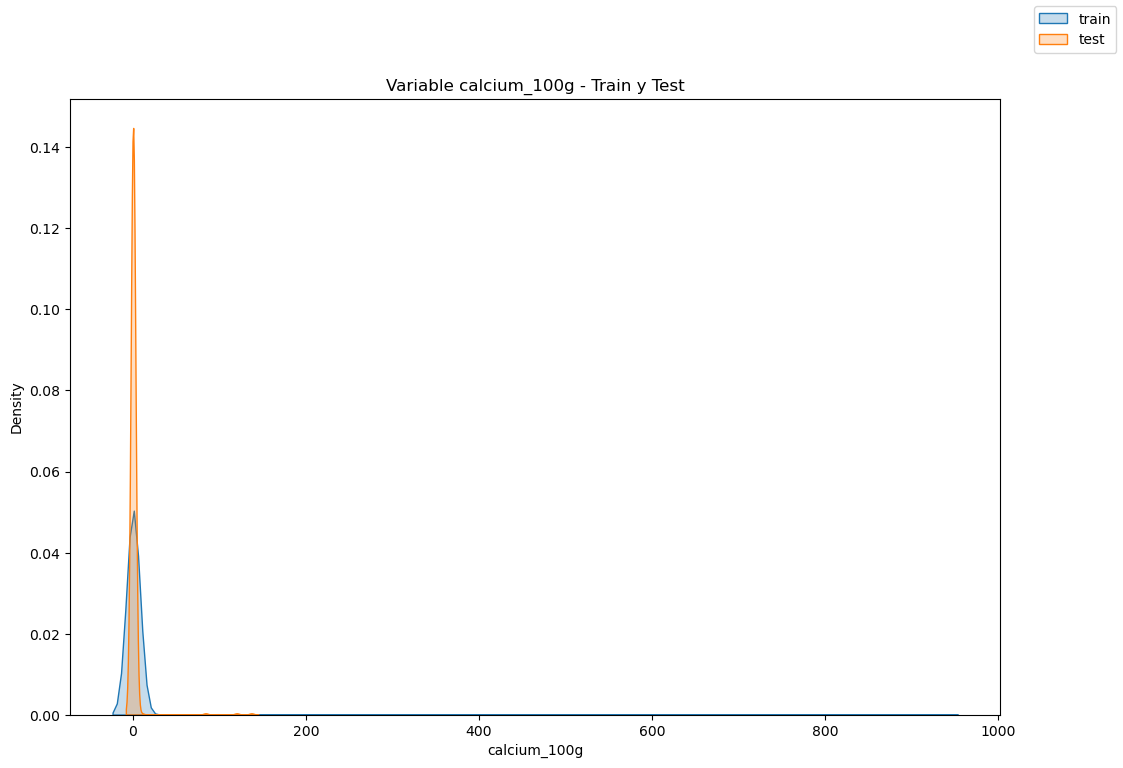

In [38]:
fig = plt.figure(figsize=(12,8))
sns.kdeplot(data=df_train_calcium_100g, x='calcium_100g',fill=True)
sns.kdeplot(data=df_test_calcium_100g, x='calcium_100g',fill=True)
fig.legend(labels=['train','test'])
plt.title('Variable calcium_100g - Train y Test')
plt.show()

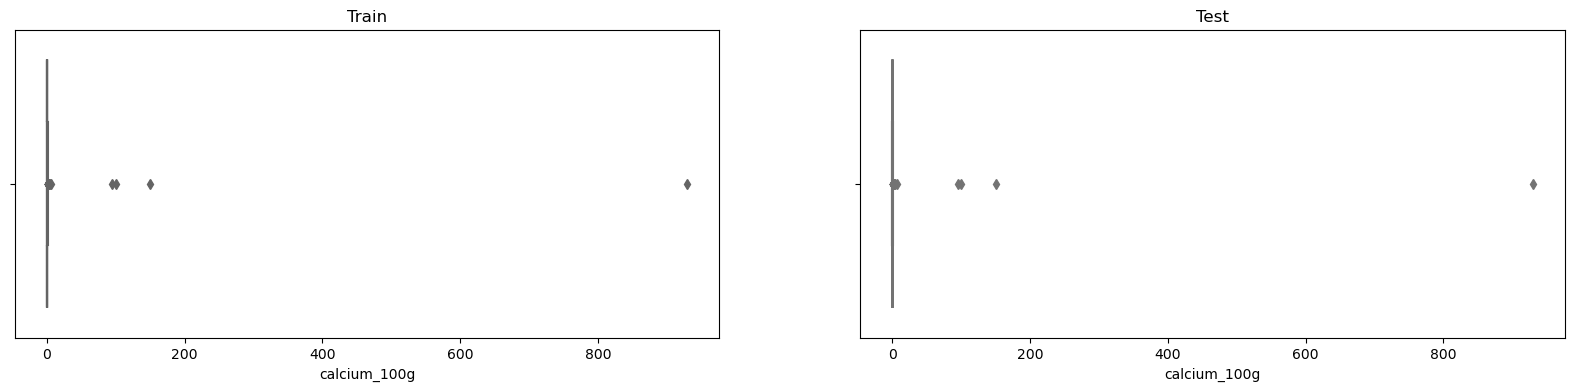

In [39]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(20,4))
sns.boxplot(data=df_train_calcium_100g, x="calcium_100g",color='coral',notch=True,ax=axs[0])
sns.boxplot(data=df_train_calcium_100g, x="calcium_100g",color='lightgreen',notch=True,ax=axs[1])
axs[0].title.set_text('Train')
axs[1].title.set_text('Test')
plt.show()

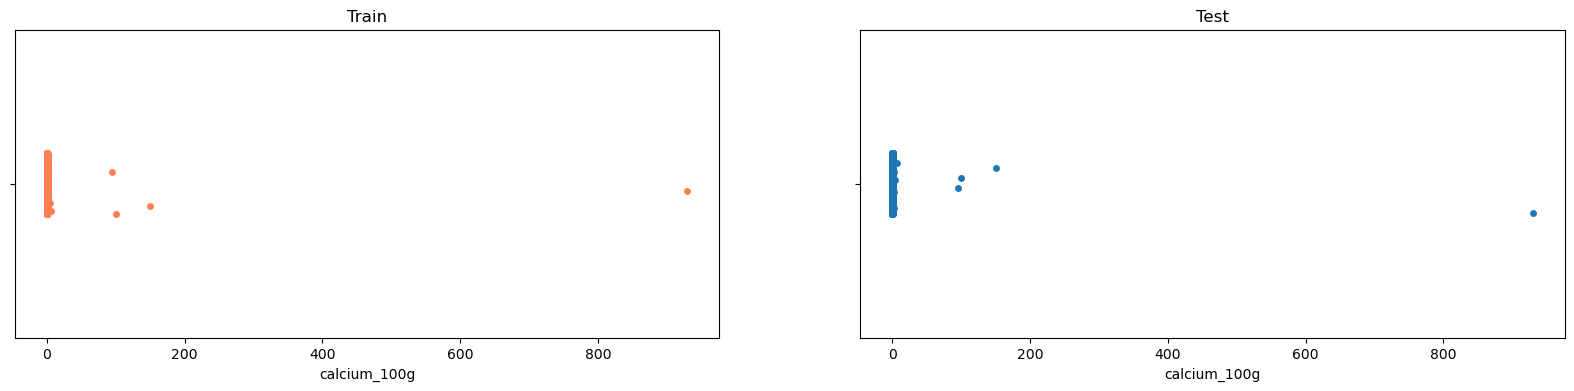

In [40]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(20,4))
sns.stripplot(data=df_train_calcium_100g, x="calcium_100g",ax=axs[0],color='coral')
sns.stripplot(data=df_train_calcium_100g, x="calcium_100g",ax=axs[1])
axs[0].title.set_text('Train')
axs[1].title.set_text('Test')
plt.show()
     

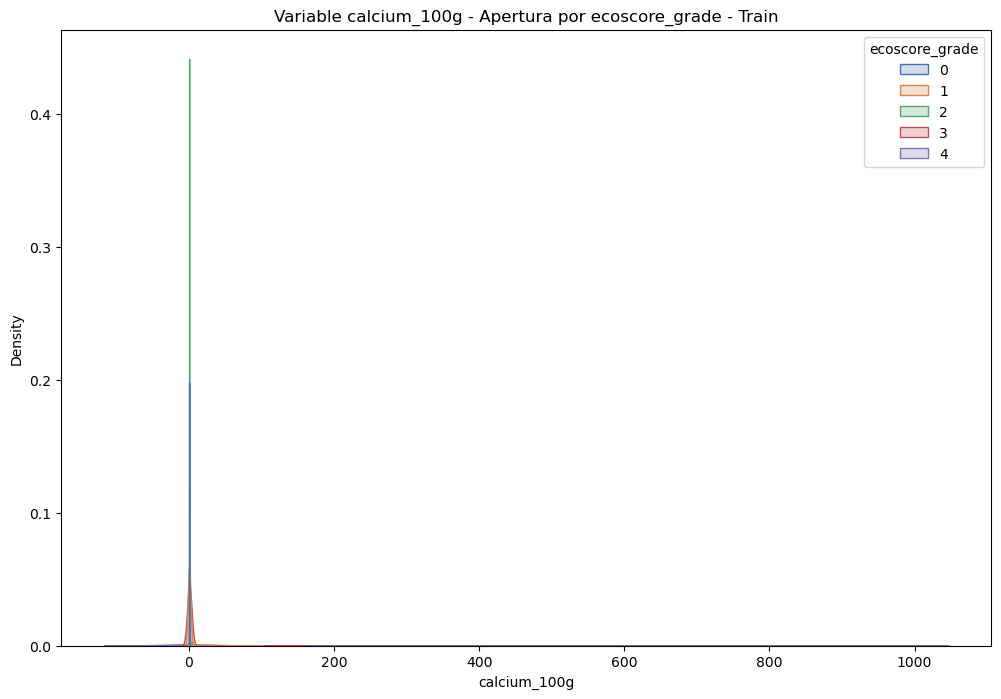

In [41]:
calcium_100g_train_target = df_train[['calcium_100g','ecoscore_grade']][df_train['calcium_100g']!='unknown']
calcium_100g_train_target['calcium_100g'] = calcium_100g_train_target['calcium_100g'].astype(float)

fig = plt.figure(figsize=(12,8))
sns.kdeplot(data=calcium_100g_train_target, x="calcium_100g", hue="ecoscore_grade",fill=True,palette="deep")
plt.title('Variable calcium_100g - Apertura por ecoscore_grade - Train')
plt.show()

### 1.1.11 'carbohydrates_100g'

In [42]:
df_train_carbohydrates_100g = pd.Series(df_train['carbohydrates_100g'][df_train['carbohydrates_100g']!='unknown'].astype(float),name='carbohydrates_100g')
df_train_carbohydrates_100g = df_train_carbohydrates_100g.to_frame()
df_train_carbohydrates_100g

,carbohydrates_100g
0,21.0
1,58.0
2,73.8
3,8.5
4,0.0
...,...
20829,3.3
20830,10.0
20832,34.0
20833,0.6


In [43]:
df_test_carbohydrates_100g = pd.Series(df_test['carbohydrates_100g'][df_test['carbohydrates_100g']!='unknown'].astype(float),name='carbohydrates_100g')
df_test_carbohydrates_100g = df_test_carbohydrates_100g.to_frame()
df_test_carbohydrates_100g

,carbohydrates_100g
0,13.10
2,11.33
3,5.70
4,10.00
5,15.86
...,...
1267,11.70
1268,8.00
1269,13.30
1270,4.20


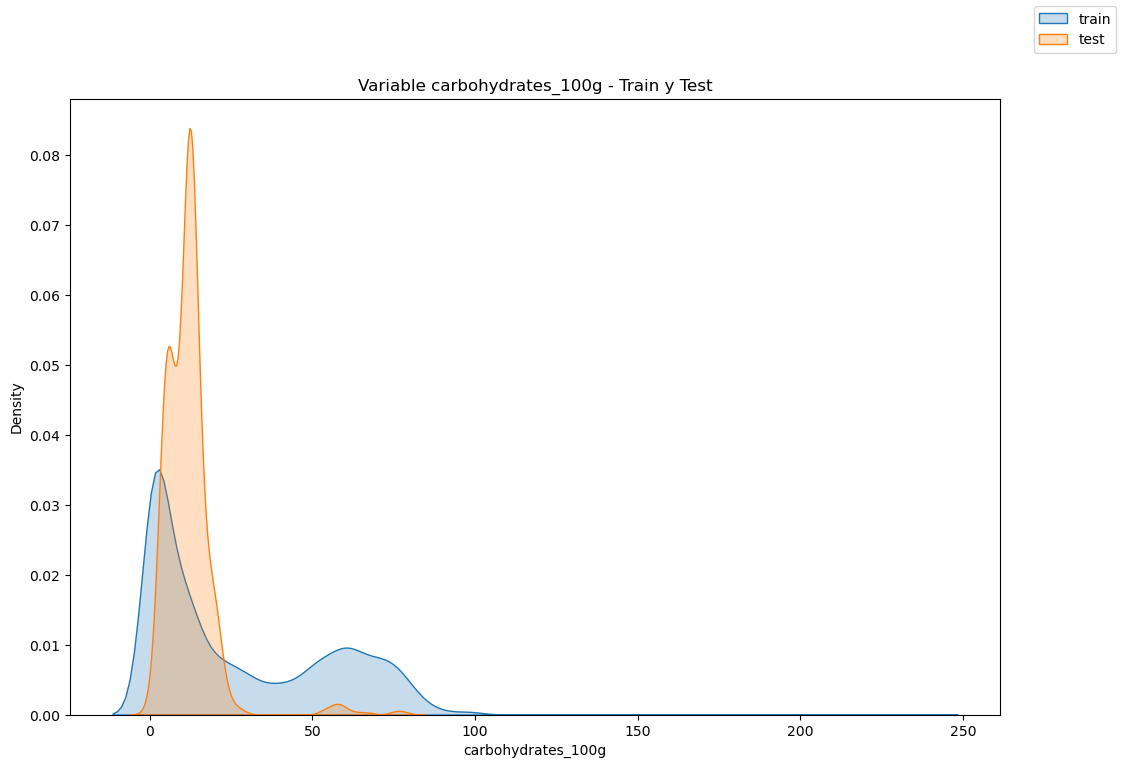

In [44]:
fig = plt.figure(figsize=(12,8))
sns.kdeplot(data=df_train_carbohydrates_100g, x='carbohydrates_100g',fill=True)
sns.kdeplot(data=df_test_carbohydrates_100g, x='carbohydrates_100g',fill=True)
fig.legend(labels=['train','test'])
plt.title('Variable carbohydrates_100g - Train y Test')
plt.show()

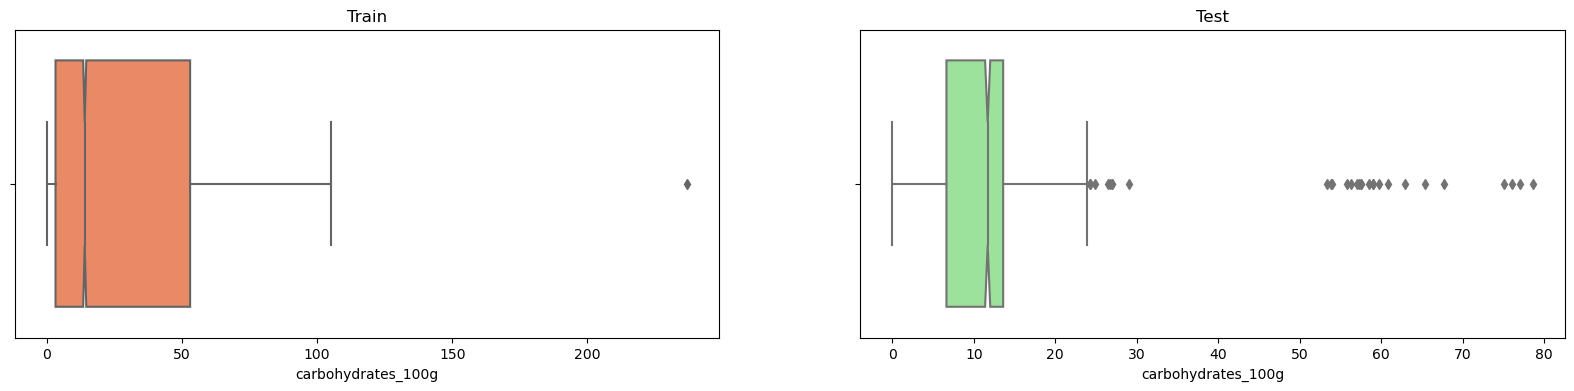

In [45]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(20,4))
sns.boxplot(data=df_train_carbohydrates_100g, x="carbohydrates_100g",color='coral',notch=True,ax=axs[0])
sns.boxplot(data=df_test_carbohydrates_100g, x="carbohydrates_100g",color='lightgreen',notch=True,ax=axs[1])
axs[0].title.set_text('Train')
axs[1].title.set_text('Test')
plt.show()

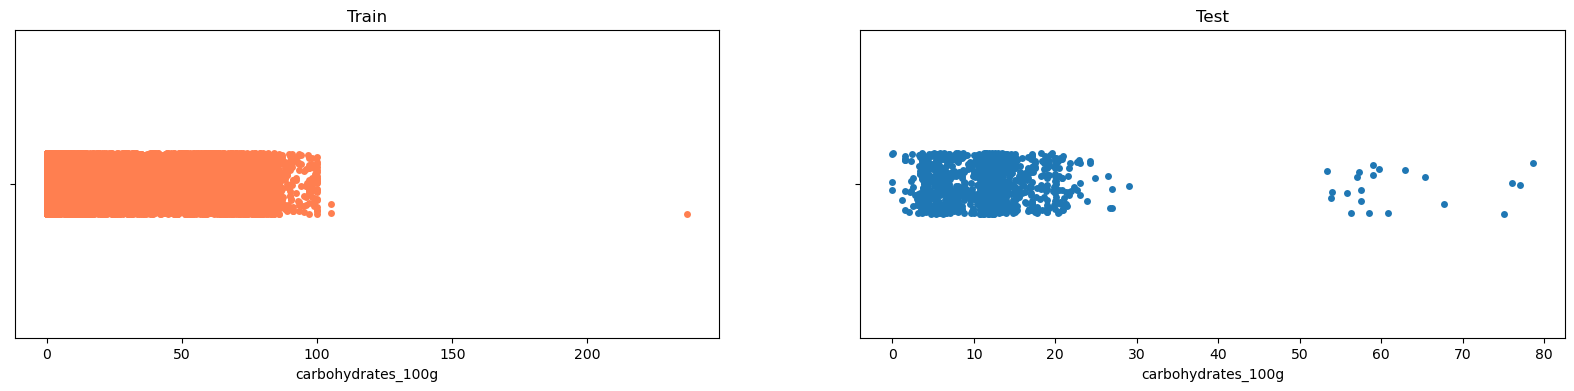

In [46]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(20,4))
sns.stripplot(data=df_train_carbohydrates_100g, x="carbohydrates_100g",ax=axs[0],color='coral')
sns.stripplot(data=df_test_carbohydrates_100g, x="carbohydrates_100g",ax=axs[1])
axs[0].title.set_text('Train')
axs[1].title.set_text('Test')
plt.show()
     

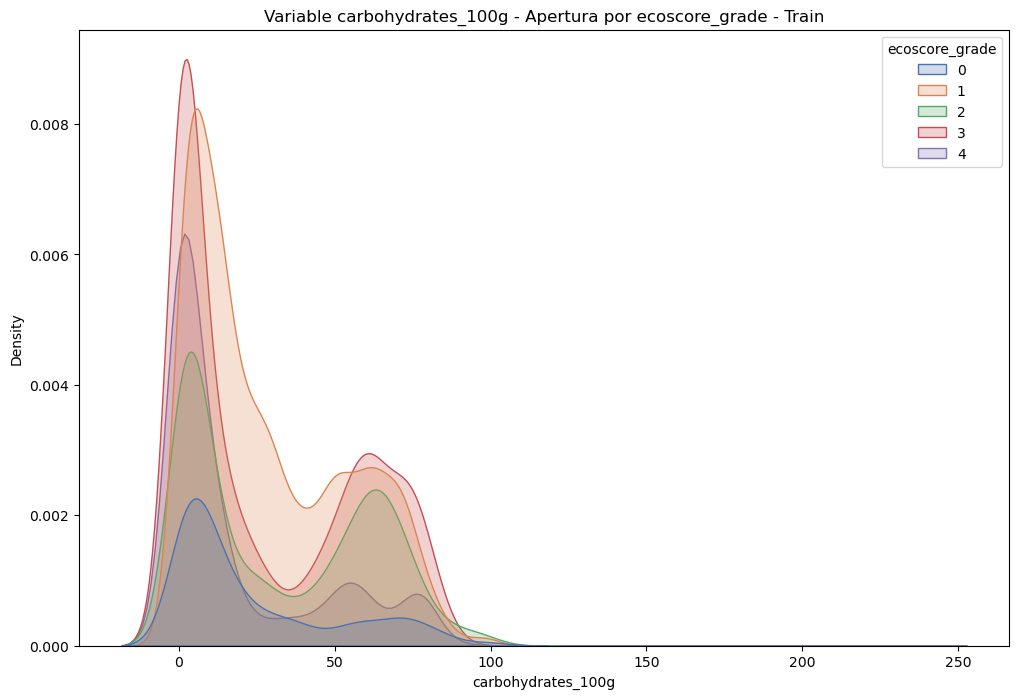

In [47]:
carbohydrates_100g_train_target = df_train[['carbohydrates_100g','ecoscore_grade']][df_train['carbohydrates_100g']!='unknown']
carbohydrates_100g_train_target['carbohydrates_100g'] = carbohydrates_100g_train_target['carbohydrates_100g'].astype(float)

fig = plt.figure(figsize=(12,8))
sns.kdeplot(data=carbohydrates_100g_train_target, x="carbohydrates_100g", hue="ecoscore_grade",fill=True,palette="deep")
plt.title('Variable carbohydrates_100g - Apertura por ecoscore_grade - Train')
plt.show()

### 1.1.12 'energy_kcal_100g'

In [48]:
df_train_energy_kcal_100g = pd.Series(df_train['energy_kcal_100g'][df_train['energy_kcal_100g']!='unknown'].astype(float),name='energy_kcal_100g')
df_train_energy_kcal_100g = df_train_energy_kcal_100g.to_frame()
df_train_energy_kcal_100g

,energy_kcal_100g
1,366.0
2,423.0
4,0.0
5,539.0
6,704.0
...,...
20829,578.0
20830,40.0
20832,592.0
20833,725.0


In [49]:
df_test_energy_kcal_100g = pd.Series(df_test['energy_kcal_100g'][df_test['energy_kcal_100g']!='unknown'].astype(float),name='energy_kcal_100g')
df_test_energy_kcal_100g = df_test_energy_kcal_100g.to_frame()
df_test_energy_kcal_100g

,energy_kcal_100g
0,95.0
2,100.0
3,72.0
4,60.0
5,415.0
...,...
1266,107.0
1267,92.0
1268,61.0
1269,96.0


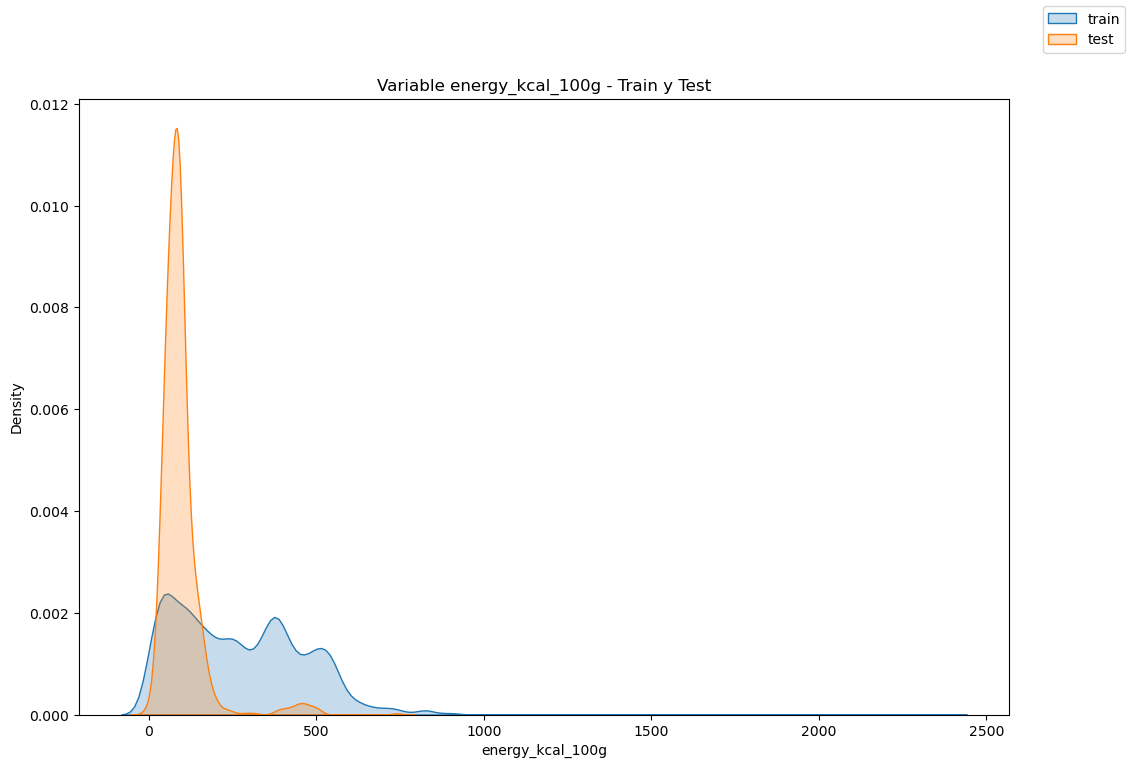

In [50]:
fig = plt.figure(figsize=(12,8))
sns.kdeplot(data=df_train_energy_kcal_100g, x='energy_kcal_100g',fill=True)
sns.kdeplot(data=df_test_energy_kcal_100g, x='energy_kcal_100g',fill=True)
fig.legend(labels=['train','test'])
plt.title('Variable energy_kcal_100g - Train y Test')
plt.show()

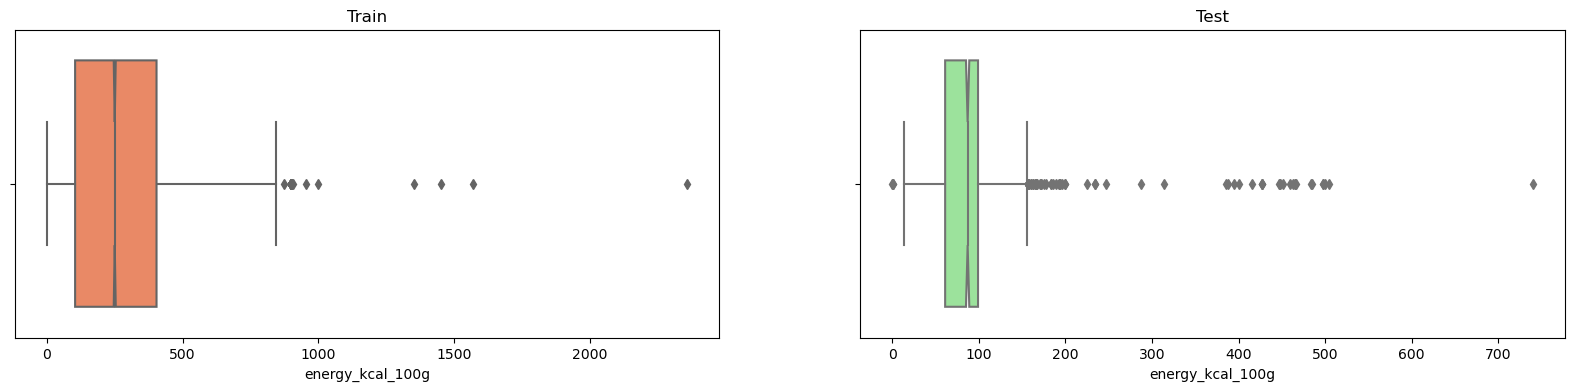

In [51]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(20,4))
sns.boxplot(data=df_train_energy_kcal_100g, x="energy_kcal_100g",color='coral',notch=True,ax=axs[0])
sns.boxplot(data=df_test_energy_kcal_100g, x="energy_kcal_100g",color='lightgreen',notch=True,ax=axs[1])
axs[0].title.set_text('Train')
axs[1].title.set_text('Test')
plt.show()

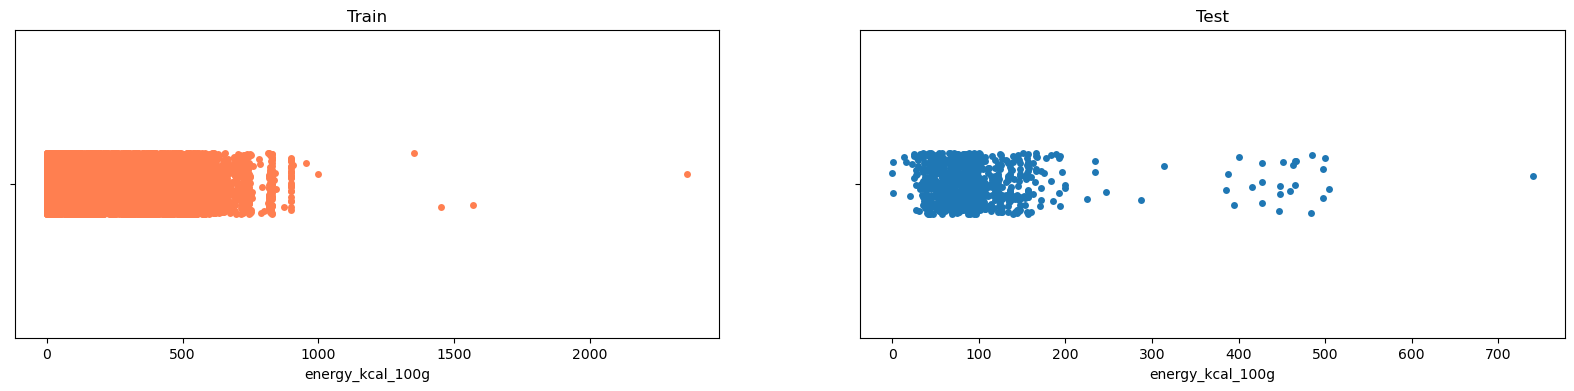

In [52]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(20,4))
sns.stripplot(data=df_train_energy_kcal_100g, x="energy_kcal_100g",ax=axs[0],color='coral')
sns.stripplot(data=df_test_energy_kcal_100g, x="energy_kcal_100g",ax=axs[1])
axs[0].title.set_text('Train')
axs[1].title.set_text('Test')
plt.show()

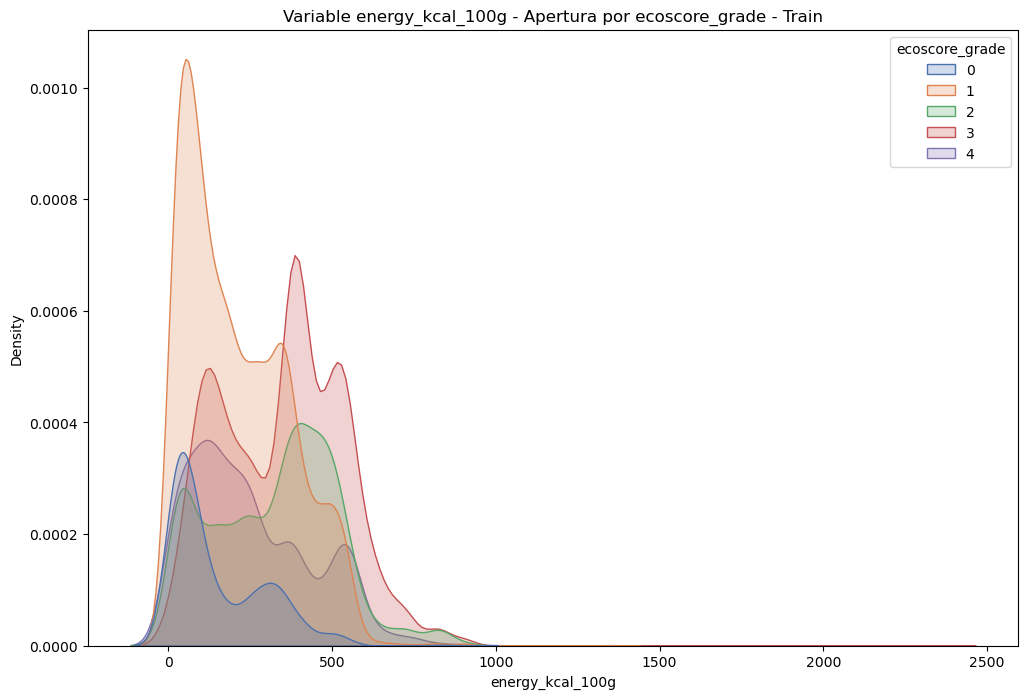

In [53]:
energy_kcal_100g_train_target = df_train[['energy_kcal_100g','ecoscore_grade']][df_train['energy_kcal_100g']!='unknown']
energy_kcal_100g_train_target['energy_kcal_100g'] = energy_kcal_100g_train_target['energy_kcal_100g'].astype(float)

fig = plt.figure(figsize=(12,8))
sns.kdeplot(data=energy_kcal_100g_train_target, x="energy_kcal_100g", hue="ecoscore_grade",fill=True,palette="deep")
plt.title('Variable energy_kcal_100g - Apertura por ecoscore_grade - Train')
plt.show()

### 1.1.13 'fat_100g'

In [54]:
df_train_fat_100g = pd.Series(df_train['fat_100g'][df_train['fat_100g']!='unknown'].astype(float),name='fat_100g')
df_train_fat_100g = df_train_fat_100g.to_frame()
df_train_fat_100g

,fat_100g
0,7.1
1,14.0
2,10.3
3,19.0
4,0.0
...,...
20828,18.0
20829,62.2
20832,45.0
20833,80.0


In [55]:
df_test_fat_100g = pd.Series(df_test['fat_100g'][df_test['fat_100g']!='unknown'].astype(float),name='fat_100g')
df_test_fat_100g = df_test_fat_100g.to_frame()
df_test_fat_100g

,fat_100g
0,3.10
2,2.67
3,3.50
4,0.90
5,3.00
...,...
1267,3.50
1268,2.50
1269,3.20
1270,5.00


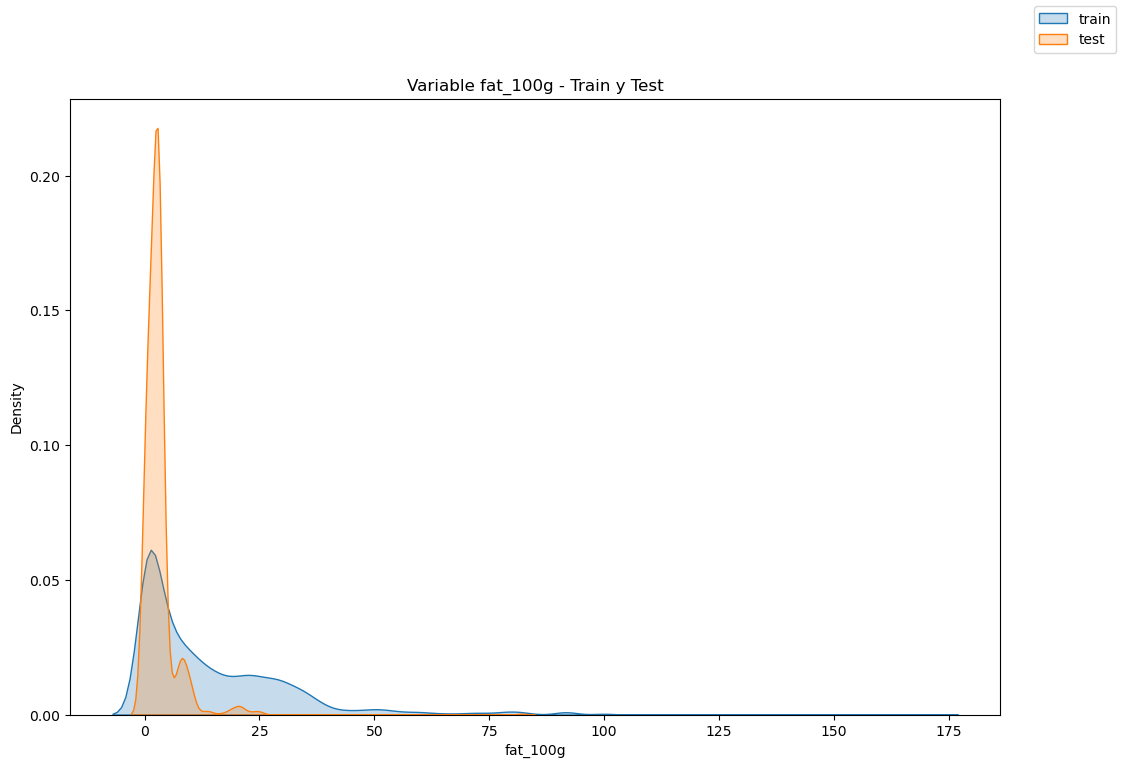

In [56]:
fig = plt.figure(figsize=(12,8))
sns.kdeplot(data=df_train_fat_100g, x='fat_100g',fill=True)
sns.kdeplot(data=df_test_fat_100g, x='fat_100g',fill=True)
fig.legend(labels=['train','test'])
plt.title('Variable fat_100g - Train y Test')
plt.show()

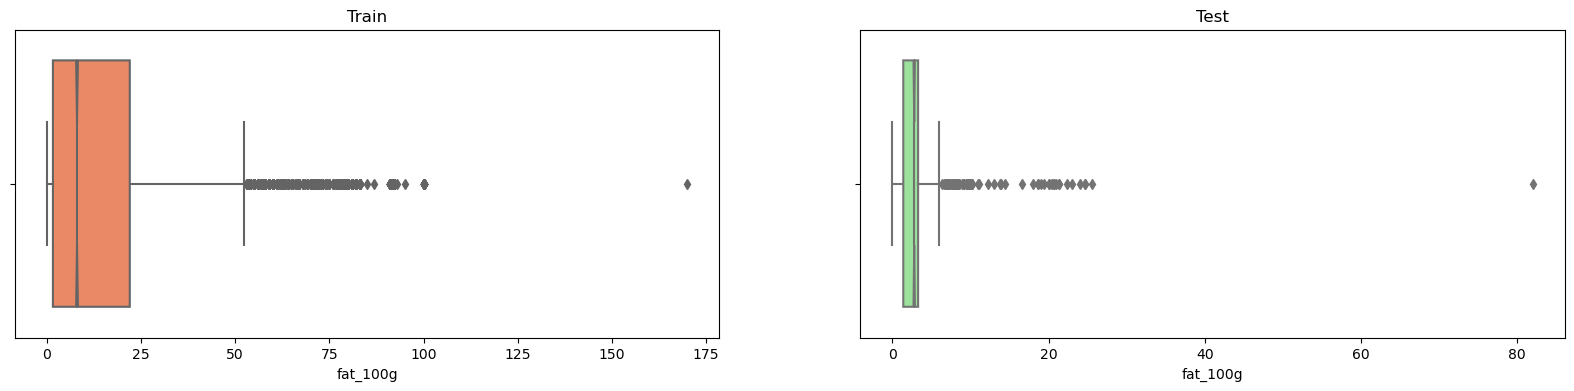

In [57]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(20,4))
sns.boxplot(data=df_train_fat_100g, x="fat_100g",color='coral',notch=True,ax=axs[0])
sns.boxplot(data=df_test_fat_100g, x="fat_100g",color='lightgreen',notch=True,ax=axs[1])
axs[0].title.set_text('Train')
axs[1].title.set_text('Test')
plt.show()

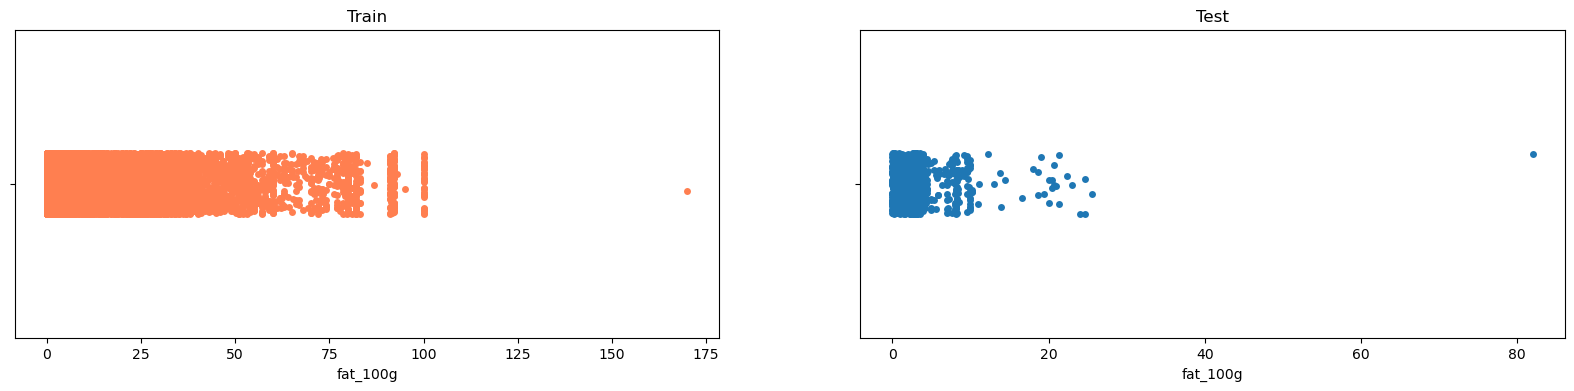

In [58]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(20,4))
sns.stripplot(data=df_train_fat_100g, x="fat_100g",ax=axs[0],color='coral')
sns.stripplot(data=df_test_fat_100g, x="fat_100g",ax=axs[1])
axs[0].title.set_text('Train')
axs[1].title.set_text('Test')
plt.show()

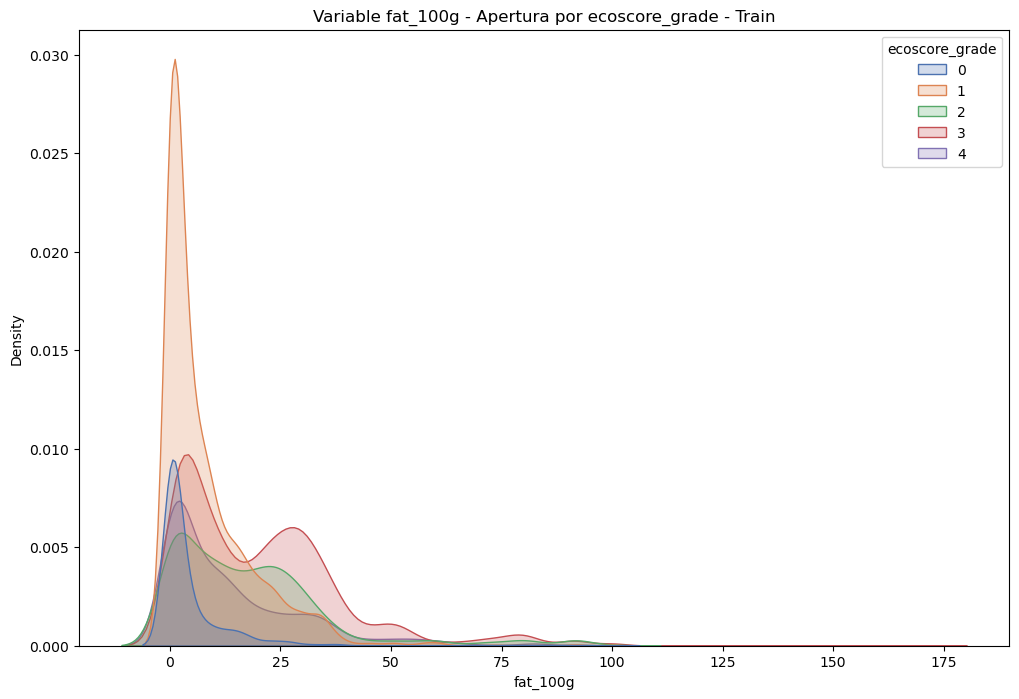

In [59]:
fat_100g_train_target = df_train[['fat_100g','ecoscore_grade']][df_train['fat_100g']!='unknown']
fat_100g_train_target['fat_100g'] = fat_100g_train_target['fat_100g'].astype(float)

fig = plt.figure(figsize=(12,8))
sns.kdeplot(data=fat_100g_train_target, x="fat_100g", hue="ecoscore_grade",fill=True,palette="deep")
plt.title('Variable fat_100g - Apertura por ecoscore_grade - Train')
plt.show()

### 1.1.14 'fiber_100g'

In [60]:
df_train_fiber_100g = pd.Series(df_train['fiber_100g'][df_train['fiber_100g']!='unknown'].astype(float),name='fiber_100g')
df_train_fiber_100g = df_train_fiber_100g.to_frame()
df_train_fiber_100g

,fiber_100g
0,2.2
2,5.0
3,0.0
4,0.0
5,6.0
...,...
20826,0.5
20828,1.4
20829,0.8
20832,8.6


In [61]:
df_test_fiber_100g = pd.Series(df_test['fiber_100g'][df_test['fiber_100g']!='unknown'].astype(float),name='fiber_100g')
df_test_fiber_100g = df_test_fiber_100g.to_frame()
df_test_fiber_100g

,fiber_100g
0,0.000
2,0.000
4,0.200
7,3.700
13,0.167
...,...
1261,0.284
1262,0.000
1264,0.400
1265,0.330


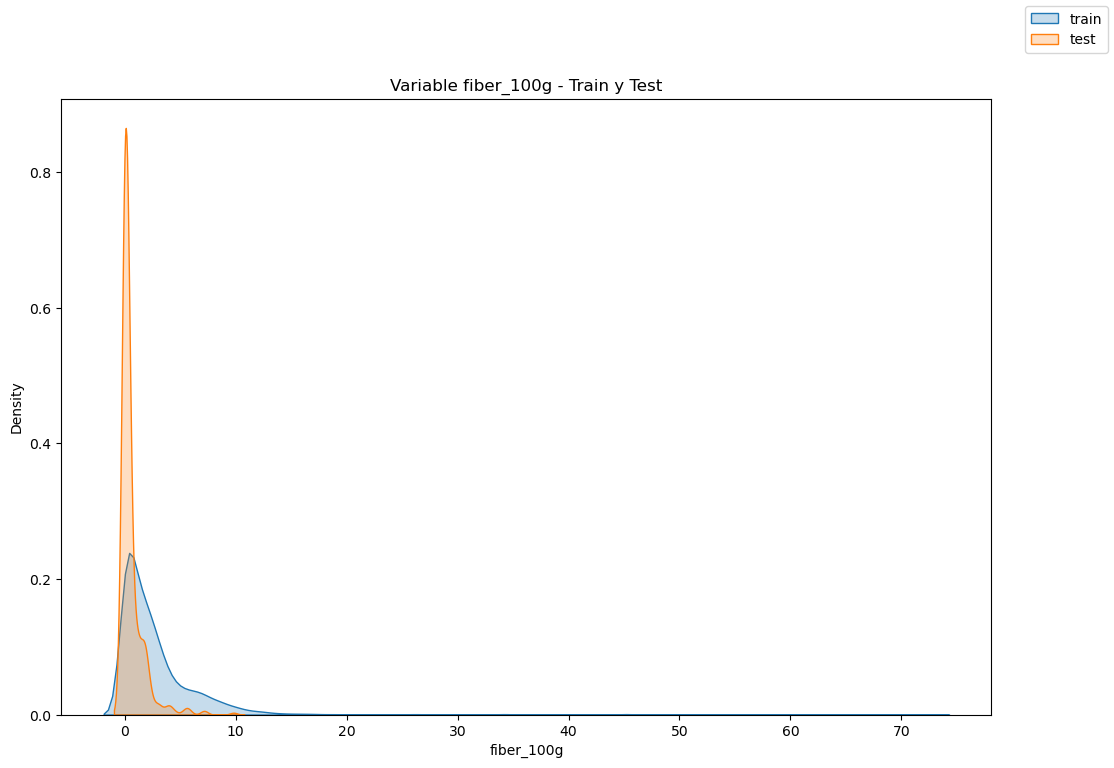

In [62]:
fig = plt.figure(figsize=(12,8))
sns.kdeplot(data=df_train_fiber_100g, x='fiber_100g',fill=True)
sns.kdeplot(data=df_test_fiber_100g, x='fiber_100g',fill=True)
fig.legend(labels=['train','test'])
plt.title('Variable fiber_100g - Train y Test')
plt.show()

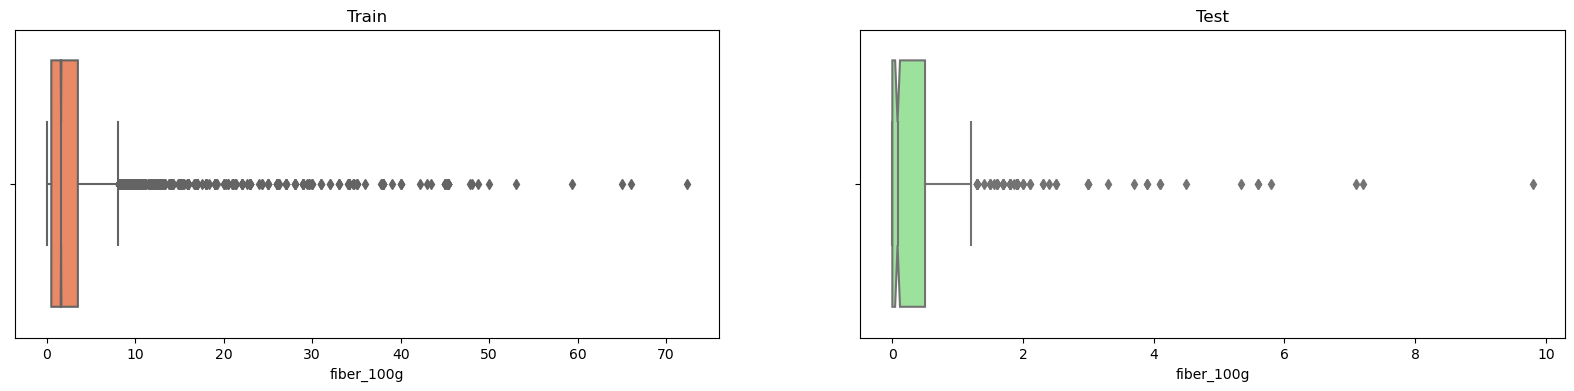

In [63]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(20,4))
sns.boxplot(data=df_train_fiber_100g, x="fiber_100g",color='coral',notch=True,ax=axs[0])
sns.boxplot(data=df_test_fiber_100g, x="fiber_100g",color='lightgreen',notch=True,ax=axs[1])
axs[0].title.set_text('Train')
axs[1].title.set_text('Test')
plt.show()

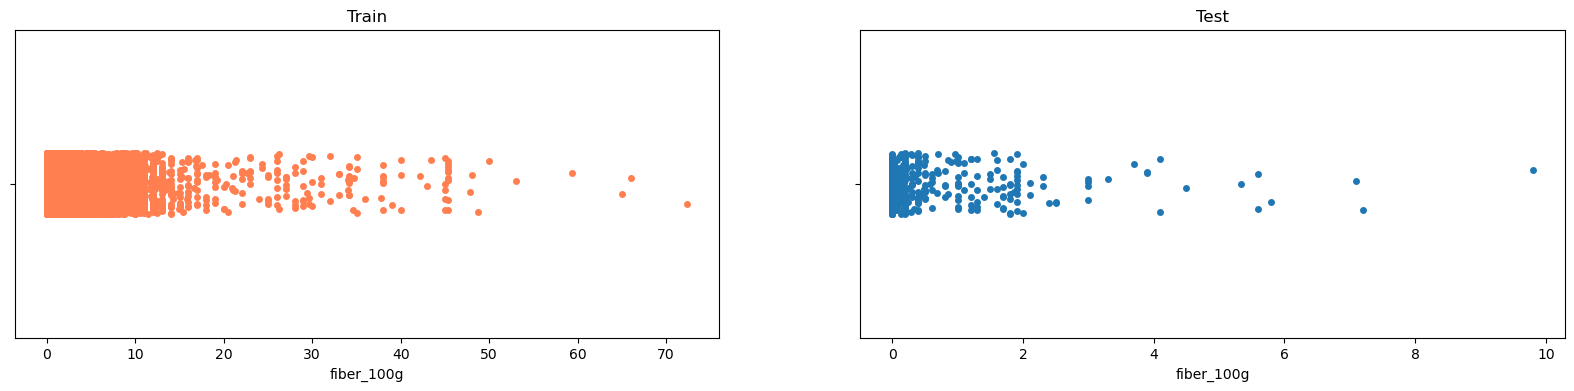

In [64]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(20,4))
sns.stripplot(data=df_train_fiber_100g, x="fiber_100g",ax=axs[0],color='coral')
sns.stripplot(data=df_test_fiber_100g, x="fiber_100g",ax=axs[1])
axs[0].title.set_text('Train')
axs[1].title.set_text('Test')
plt.show()

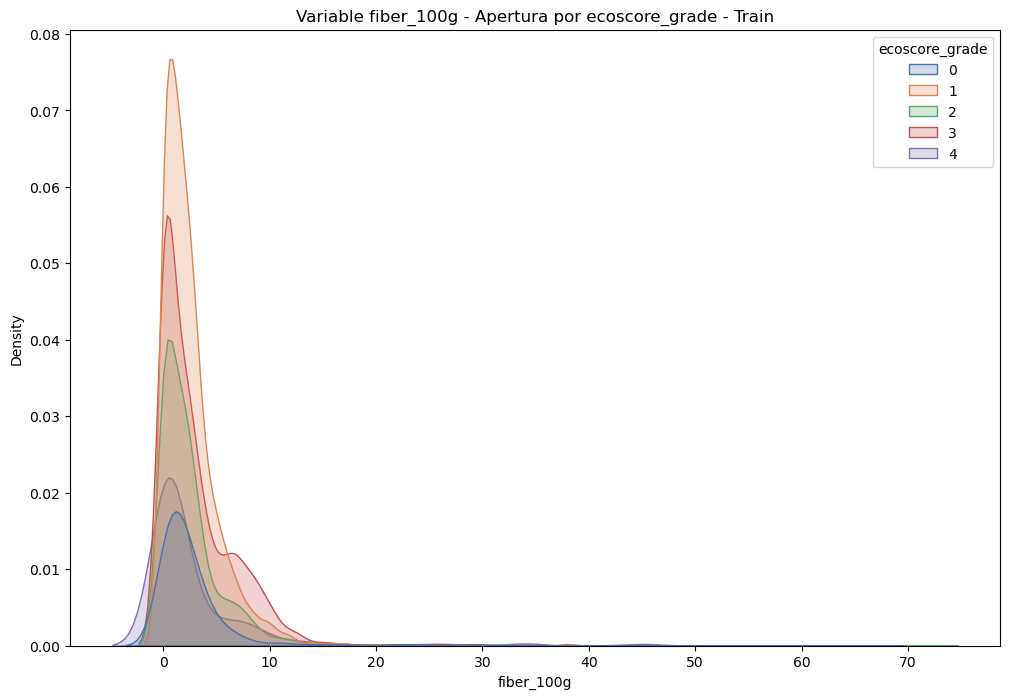

In [65]:
fiber_100g_train_target = df_train[['fiber_100g','ecoscore_grade']][df_train['fiber_100g']!='unknown']
fiber_100g_train_target['fiber_100g'] = fiber_100g_train_target['fiber_100g'].astype(float)

fig = plt.figure(figsize=(12,8))
sns.kdeplot(data=fiber_100g_train_target, x="fiber_100g", hue="ecoscore_grade",fill=True,palette="deep")
plt.title('Variable fiber_100g - Apertura por ecoscore_grade - Train')
plt.show()

### 1.1.15 'proteins_100g'

In [66]:
df_train_proteins_100g = pd.Series(df_train['proteins_100g'][df_train['proteins_100g']!='unknown'].astype(float),name='proteins_100g')
df_train_proteins_100g = df_train_proteins_100g.to_frame()
df_train_proteins_100g

,proteins_100g
0,2.2
1,2.9
2,6.2
3,15.0
4,0.0
...,...
20828,5.7
20829,1.2
20832,8.5
20833,0.7


In [67]:
df_test_proteins_100g = pd.Series(df_test['proteins_100g'][df_test['proteins_100g']!='unknown'].astype(float),name='proteins_100g')
df_test_proteins_100g = df_test_proteins_100g.to_frame()
df_test_proteins_100g

,proteins_100g
0,3.60
2,7.33
3,4.30
4,2.90
5,2.30
...,...
1267,3.40
1268,1.70
1269,3.50
1270,8.80


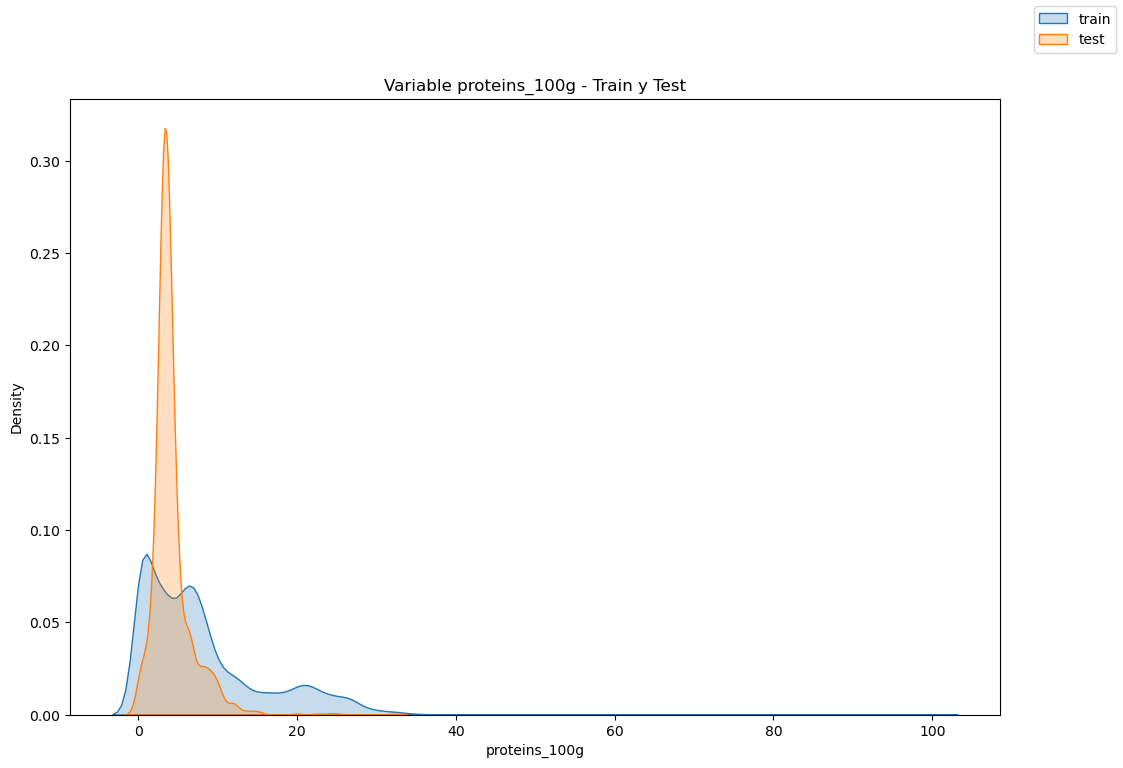

In [68]:
fig = plt.figure(figsize=(12,8))
sns.kdeplot(data=df_train_proteins_100g, x='proteins_100g',fill=True)
sns.kdeplot(data=df_test_proteins_100g, x='proteins_100g',fill=True)
fig.legend(labels=['train','test'])
plt.title('Variable proteins_100g - Train y Test')
plt.show()

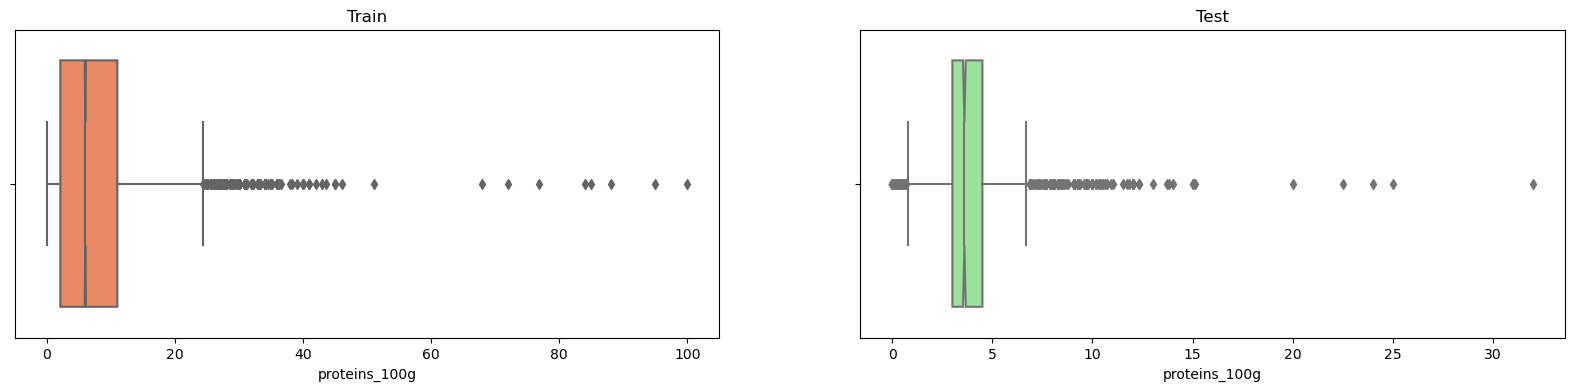

In [69]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(20,4))
sns.boxplot(data=df_train_proteins_100g, x="proteins_100g",color='coral',notch=True,ax=axs[0])
sns.boxplot(data=df_test_proteins_100g, x="proteins_100g",color='lightgreen',notch=True,ax=axs[1])
axs[0].title.set_text('Train')
axs[1].title.set_text('Test')
plt.show()

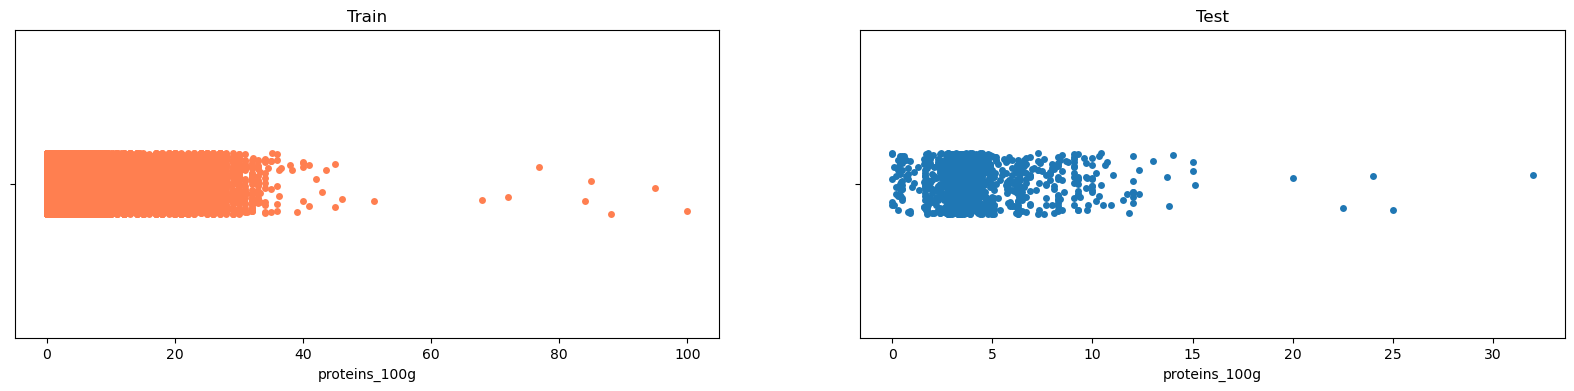

In [70]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(20,4))
sns.stripplot(data=df_train_proteins_100g, x="proteins_100g",ax=axs[0],color='coral')
sns.stripplot(data=df_test_proteins_100g, x="proteins_100g",ax=axs[1])
axs[0].title.set_text('Train')
axs[1].title.set_text('Test')
plt.show()

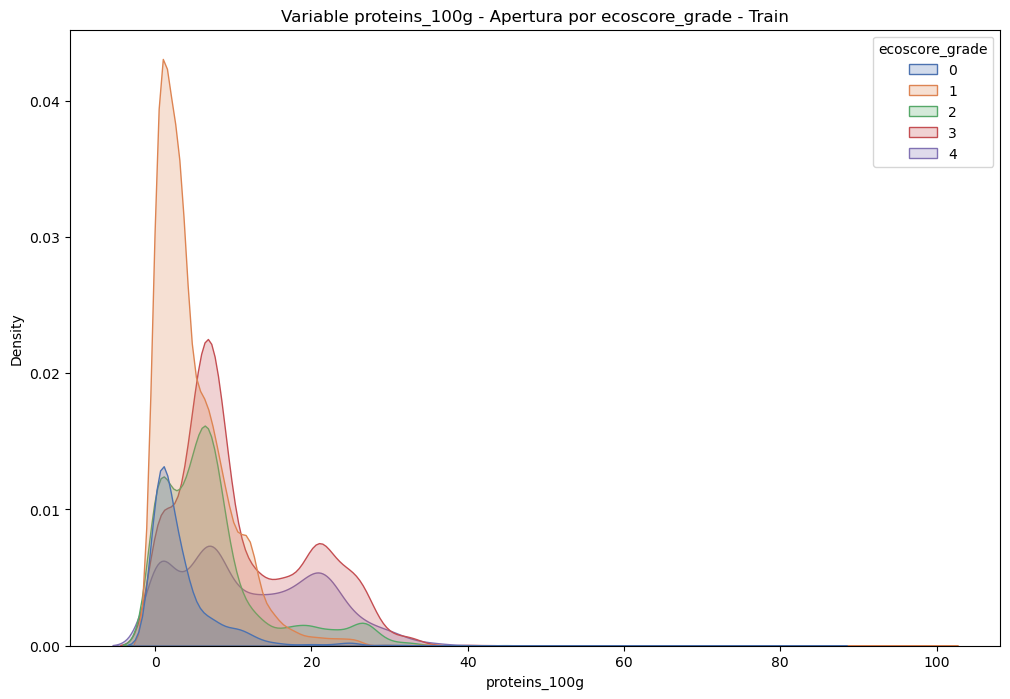

In [71]:
proteins_100g_train_target = df_train[['proteins_100g','ecoscore_grade']][df_train['proteins_100g']!='unknown']
proteins_100g_train_target['proteins_100g'] = proteins_100g_train_target['proteins_100g'].astype(float)

fig = plt.figure(figsize=(12,8))
sns.kdeplot(data=proteins_100g_train_target, x="proteins_100g", hue="ecoscore_grade",fill=True,palette="deep")
plt.title('Variable proteins_100g - Apertura por ecoscore_grade - Train')
plt.show()

### 1.1.16 'salt_100g'

In [72]:
df_train_salt_100g = pd.Series(df_train['salt_100g'][df_train['salt_100g']!='unknown'].astype(float),name='salt_100g')
df_train_salt_100g = df_train_salt_100g.to_frame()
df_train_salt_100g

,salt_100g
0,0.70
1,0.30
2,0.90
3,2.50
4,0.00
...,...
20828,0.83
20829,1.50
20832,0.00
20833,2.00


In [73]:
df_test_salt_100g = pd.Series(df_test['salt_100g'][df_test['salt_100g']!='unknown'].astype(float),name='salt_100g')
df_test_salt_100g = df_test_salt_100g.to_frame()
df_test_salt_100g

,salt_100g
0,0.1000
2,0.0825
3,0.1600
4,0.1000
5,0.0000
...,...
1266,0.1000
1267,0.1300
1268,0.0000
1269,0.1300


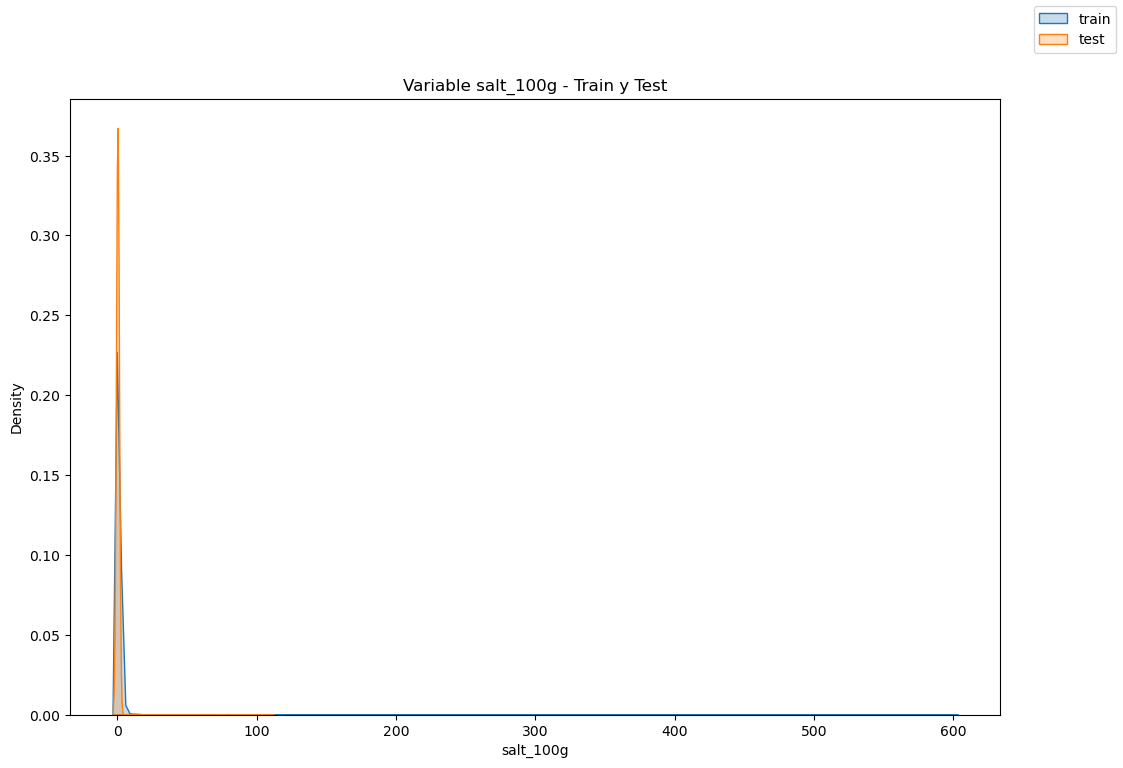

In [74]:
fig = plt.figure(figsize=(12,8))
sns.kdeplot(data=df_train_salt_100g, x='salt_100g',fill=True)
sns.kdeplot(data=df_test_salt_100g, x='salt_100g',fill=True)
fig.legend(labels=['train','test'])
plt.title('Variable salt_100g - Train y Test')
plt.show()

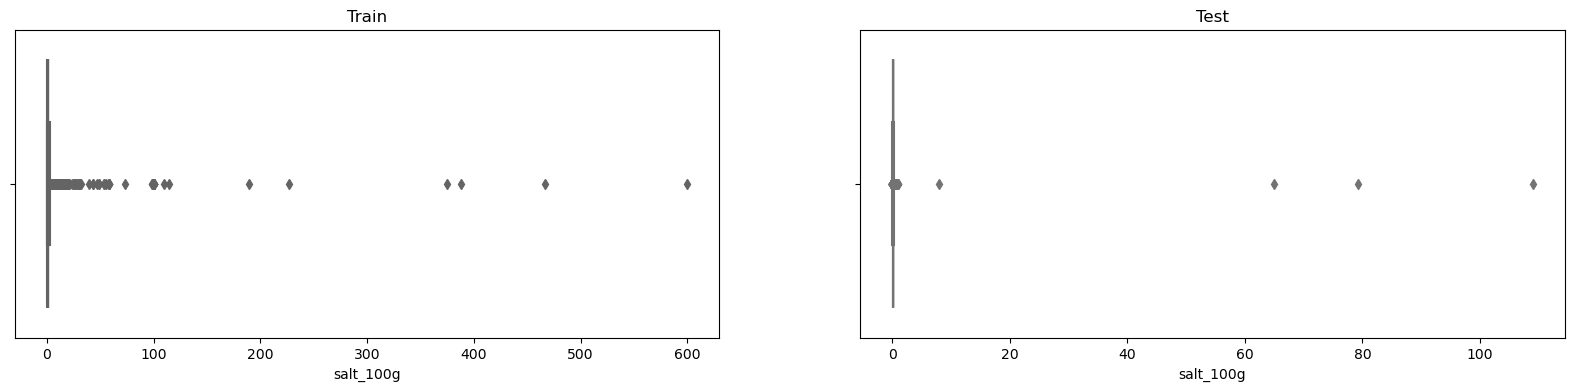

In [75]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(20,4))
sns.boxplot(data=df_train_salt_100g, x="salt_100g",color='coral',notch=True,ax=axs[0])
sns.boxplot(data=df_test_salt_100g, x="salt_100g",color='lightgreen',notch=True,ax=axs[1])
axs[0].title.set_text('Train')
axs[1].title.set_text('Test')
plt.show()

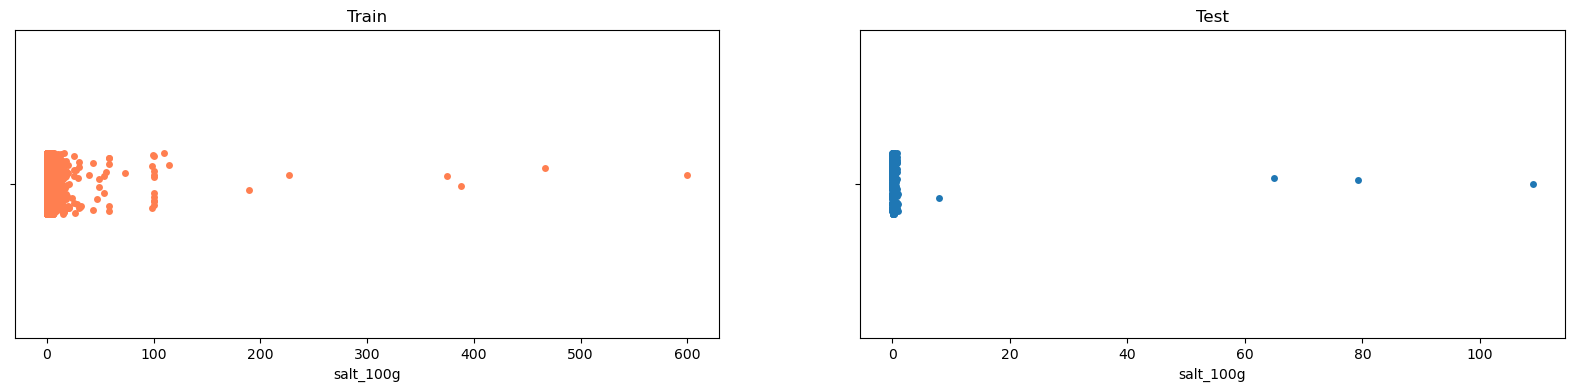

In [76]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(20,4))
sns.stripplot(data=df_train_salt_100g, x="salt_100g",ax=axs[0],color='coral')
sns.stripplot(data=df_test_salt_100g, x="salt_100g",ax=axs[1])
axs[0].title.set_text('Train')
axs[1].title.set_text('Test')
plt.show()

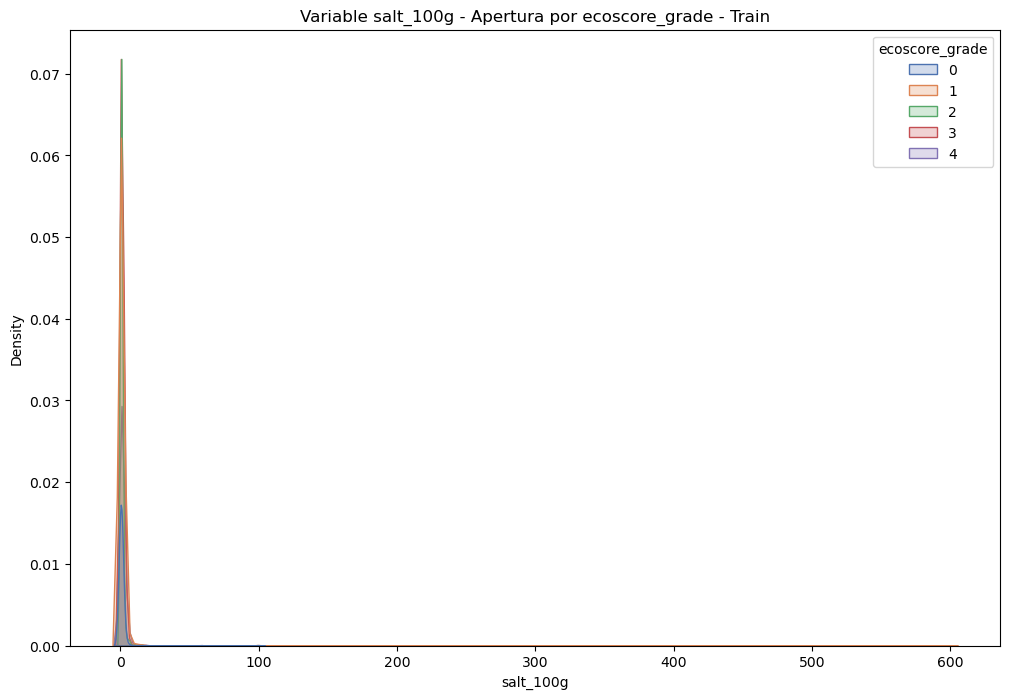

In [77]:
salt_100g_train_target = df_train[['salt_100g','ecoscore_grade']][df_train['salt_100g']!='unknown']
salt_100g_train_target['salt_100g'] = salt_100g_train_target['salt_100g'].astype(float)

fig = plt.figure(figsize=(12,8))
sns.kdeplot(data=salt_100g_train_target, x="salt_100g", hue="ecoscore_grade",fill=True,palette="deep")
plt.title('Variable salt_100g - Apertura por ecoscore_grade - Train')
plt.show()

### 1.1.17 'sodium_100g'

In [78]:
df_train_sodium_100g = pd.Series(df_train['sodium_100g'][df_train['sodium_100g']!='unknown'].astype(float),name='sodium_100g')
df_train_sodium_100g = df_train_sodium_100g.to_frame()
df_train_sodium_100g

,sodium_100g
0,0.280
1,0.120
2,0.360
3,1.000
4,0.000
...,...
20828,0.332
20829,0.600
20832,0.000
20833,0.800


In [79]:
df_test_sodium_100g = pd.Series(df_test['sodium_100g'][df_test['sodium_100g']!='unknown'].astype(float),name='sodium_100g')
df_test_sodium_100g = df_test_sodium_100g.to_frame()
df_test_sodium_100g

,sodium_100g
0,0.040
2,0.033
3,0.064
4,0.040
5,0.000
...,...
1266,0.040
1267,0.052
1268,0.000
1269,0.052


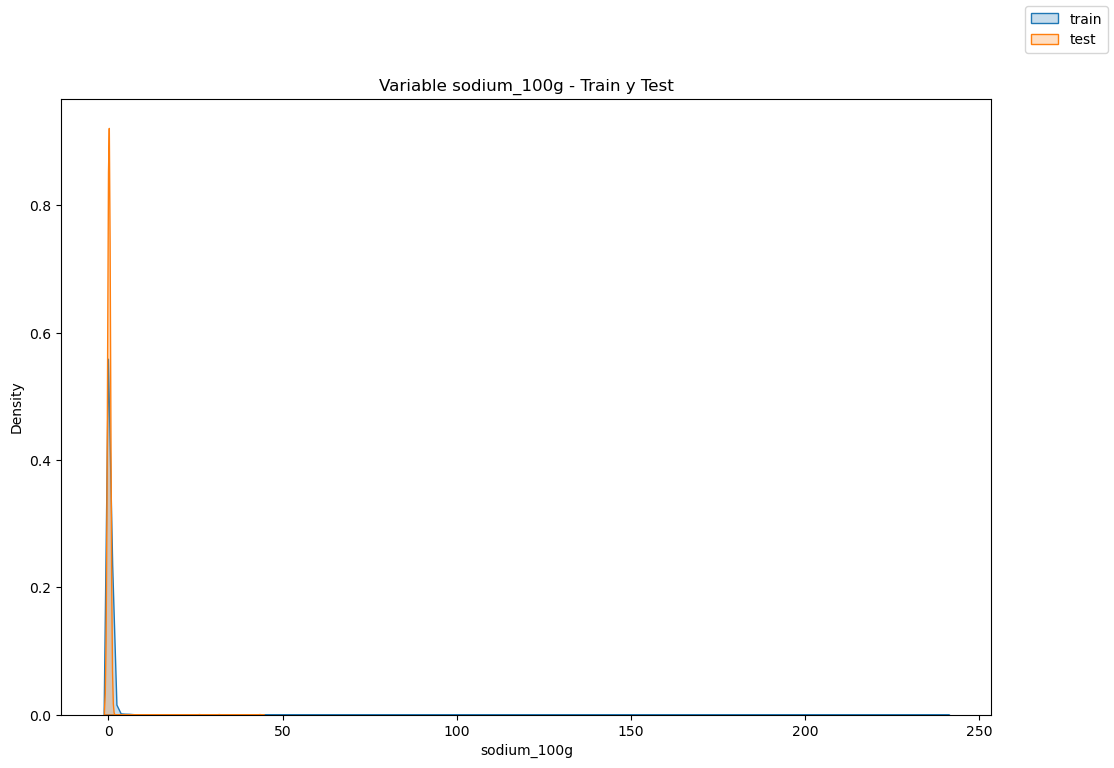

In [80]:
fig = plt.figure(figsize=(12,8))
sns.kdeplot(data=df_train_sodium_100g, x='sodium_100g',fill=True)
sns.kdeplot(data=df_test_sodium_100g, x='sodium_100g',fill=True)
fig.legend(labels=['train','test'])
plt.title('Variable sodium_100g - Train y Test')
plt.show()

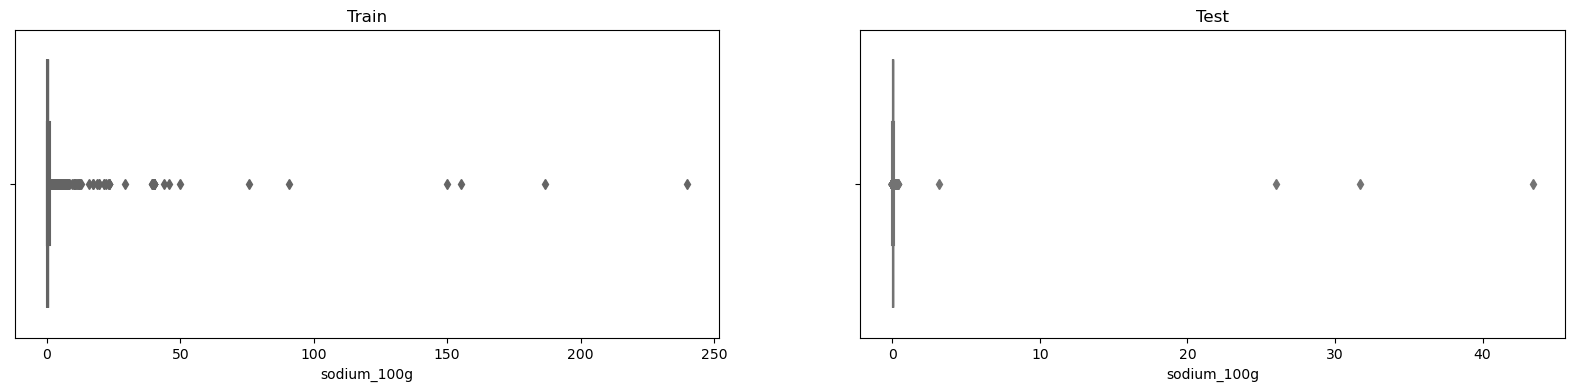

In [81]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(20,4))
sns.boxplot(data=df_train_sodium_100g, x="sodium_100g",color='coral',notch=True,ax=axs[0])
sns.boxplot(data=df_test_sodium_100g, x="sodium_100g",color='lightgreen',notch=True,ax=axs[1])
axs[0].title.set_text('Train')
axs[1].title.set_text('Test')
plt.show()

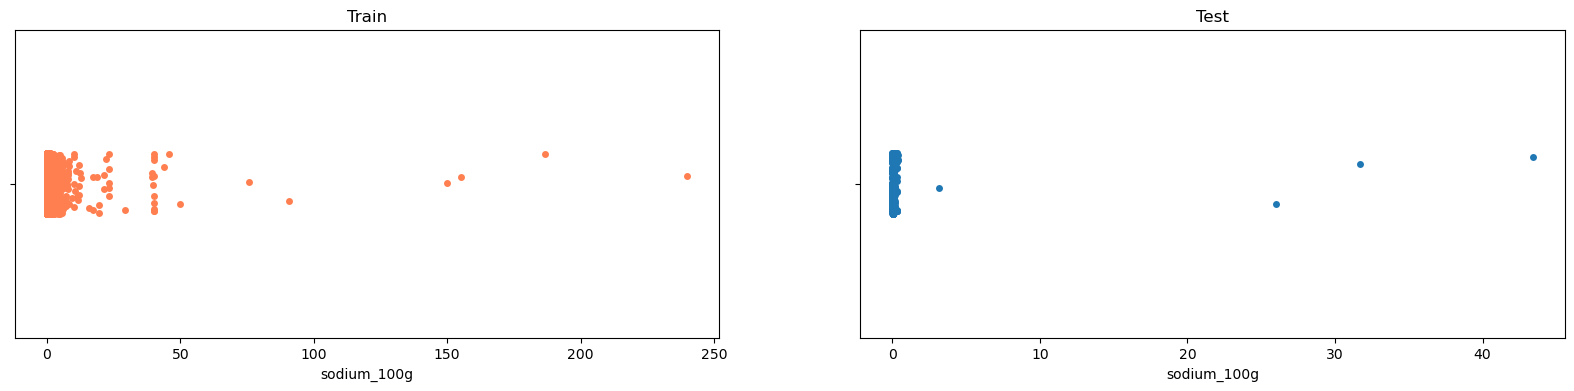

In [82]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(20,4))
sns.stripplot(data=df_train_sodium_100g, x="sodium_100g",ax=axs[0],color='coral')
sns.stripplot(data=df_test_sodium_100g, x="sodium_100g",ax=axs[1])
axs[0].title.set_text('Train')
axs[1].title.set_text('Test')
plt.show()

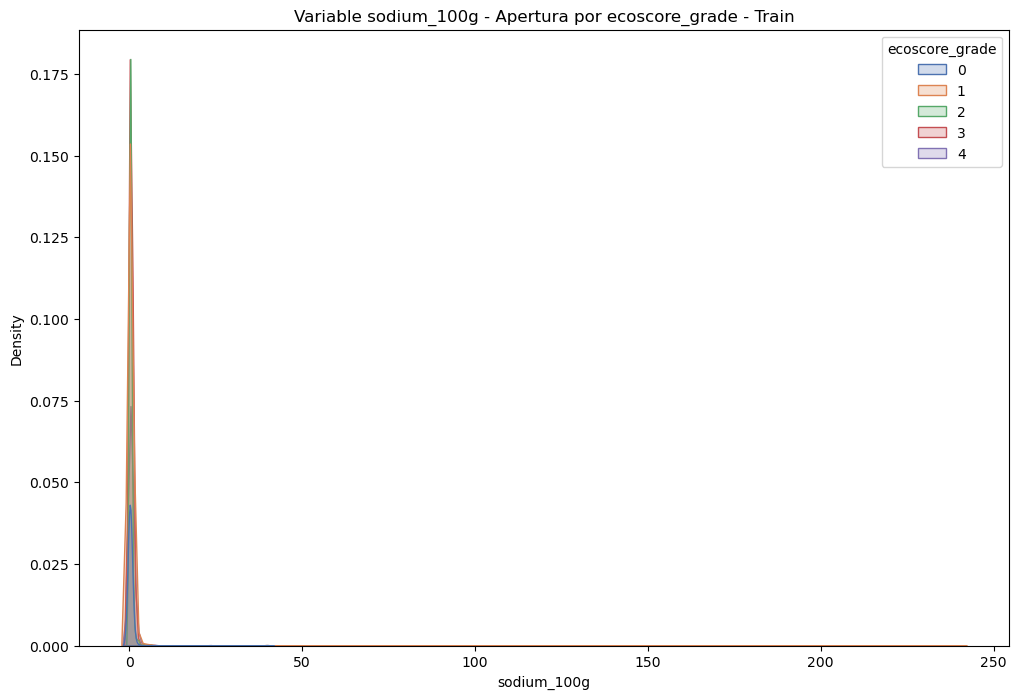

In [83]:
sodium_100g_train_target = df_train[['sodium_100g','ecoscore_grade']][df_train['sodium_100g']!='unknown']
sodium_100g_train_target['sodium_100g'] = sodium_100g_train_target['sodium_100g'].astype(float)

fig = plt.figure(figsize=(12,8))
sns.kdeplot(data=sodium_100g_train_target, x="sodium_100g", hue="ecoscore_grade",fill=True,palette="deep")
plt.title('Variable sodium_100g - Apertura por ecoscore_grade - Train')
plt.show()

### 1.1.18 'sugars_100g'

In [84]:
df_train_sugars_100g = pd.Series(df_train['sugars_100g'][df_train['sugars_100g']!='unknown'].astype(float),name='sugars_100g')
df_train_sugars_100g = df_train_sugars_100g.to_frame()
df_train_sugars_100g

,sugars_100g
0,0.5
1,37.0
2,25.0
3,8.5
4,0.0
...,...
20829,0.4
20830,9.8
20832,30.0
20833,0.6


In [85]:
df_test_sugars_100g = pd.Series(df_test['sugars_100g'][df_test['sugars_100g']!='unknown'].astype(float),name='sugars_100g')
df_test_sugars_100g = df_test_sugars_100g.to_frame()
df_test_sugars_100g

,sugars_100g
0,13.10
2,10.67
3,5.70
4,0.20
5,10.40
...,...
1266,14.50
1267,11.40
1268,8.00
1269,12.80


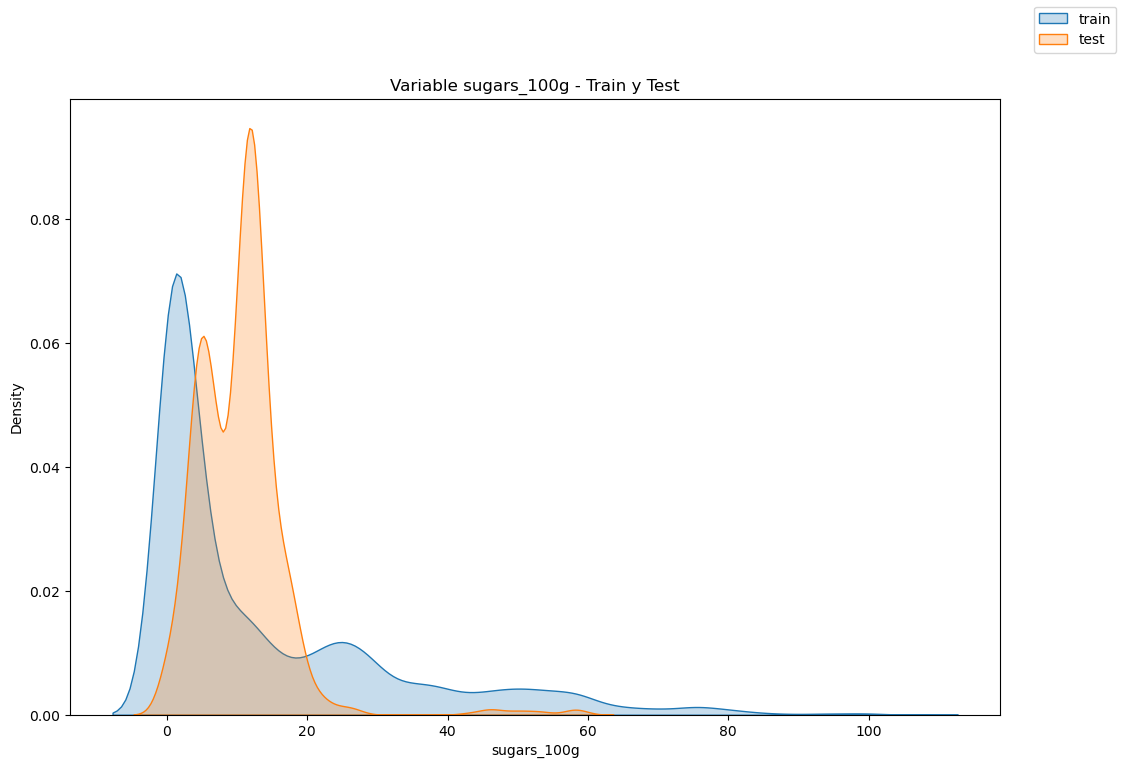

In [86]:
fig = plt.figure(figsize=(12,8))
sns.kdeplot(data=df_train_sugars_100g, x='sugars_100g',fill=True)
sns.kdeplot(data=df_test_sugars_100g, x='sugars_100g',fill=True)
fig.legend(labels=['train','test'])
plt.title('Variable sugars_100g - Train y Test')
plt.show()

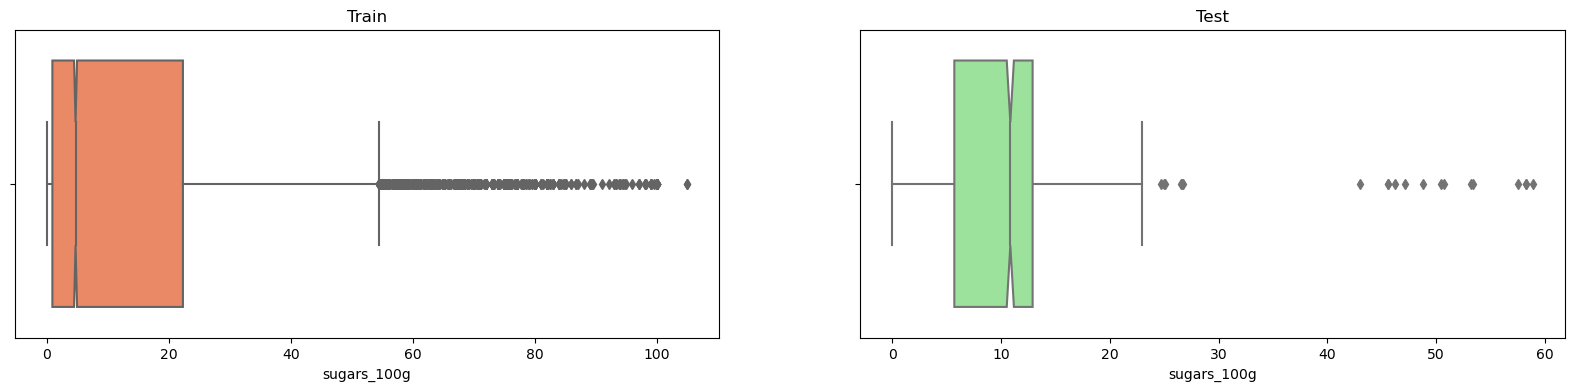

In [87]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(20,4))
sns.boxplot(data=df_train_sugars_100g, x="sugars_100g",color='coral',notch=True,ax=axs[0])
sns.boxplot(data=df_test_sugars_100g, x="sugars_100g",color='lightgreen',notch=True,ax=axs[1])
axs[0].title.set_text('Train')
axs[1].title.set_text('Test')
plt.show()

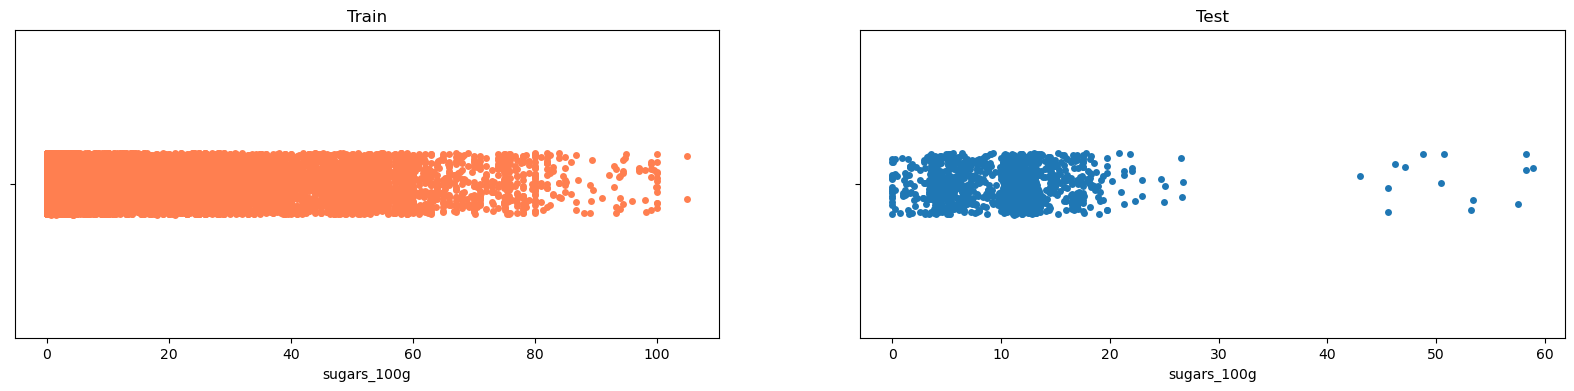

In [88]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(20,4))
sns.stripplot(data=df_train_sugars_100g, x="sugars_100g",ax=axs[0],color='coral')
sns.stripplot(data=df_test_sugars_100g, x="sugars_100g",ax=axs[1])
axs[0].title.set_text('Train')
axs[1].title.set_text('Test')
plt.show()

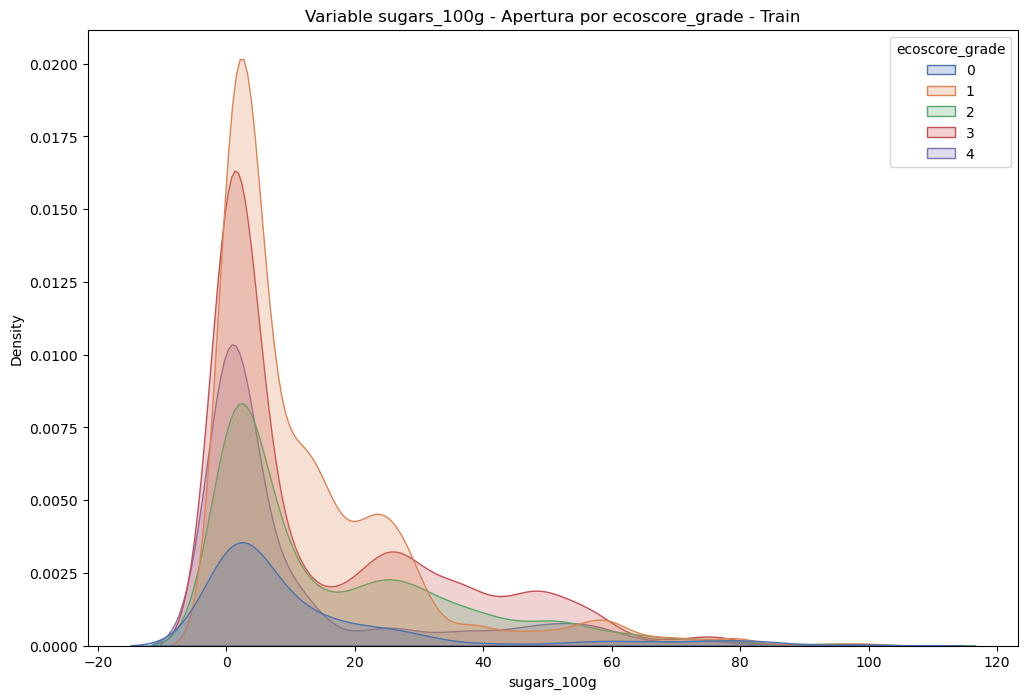

In [89]:
sugars_100g_train_target = df_train[['sugars_100g','ecoscore_grade']][df_train['sugars_100g']!='unknown']
sugars_100g_train_target['sugars_100g'] = sugars_100g_train_target['sugars_100g'].astype(float)

fig = plt.figure(figsize=(12,8))
sns.kdeplot(data=sugars_100g_train_target, x="sugars_100g", hue="ecoscore_grade",fill=True,palette="deep")
plt.title('Variable sugars_100g - Apertura por ecoscore_grade - Train')
plt.show()

### 1.1.19 'nutrition_grade'

In [90]:
df_train['nutrition_grade'].value_counts()

d          4889
unknown    3922
c          3882
e          3057
a          2650
b          2435
Name: nutrition_grade, dtype: int64

In [91]:
df_test['nutrition_grade'].value_counts()

b          387
c          300
a          202
unknown    200
e          133
d           50
Name: nutrition_grade, dtype: int64

### 1.1.20 'packaging_materials'

In [92]:
df_train['packaging_materials'].value_counts()[0:20]

[en:unknown]                              10325
[en:plastic]                               3890
[en:cardboard, en:plastic]                 1549
[en:cardboard]                              878
[en:plastic, en:unknown]                    528
[en:glass]                                  518
[en:metal]                                  435
[en:metal, en:glass]                        274
[en:cardboard, en:plastic, en:unknown]      227
[en:paper]                                  167
[en:pp-polypropylene]                       137
[en:cardboard, en:unknown]                  121
[en:metal, en:plastic]                       92
[en:cardboard, en:heavy-aluminium]           88
[en:tetra-pak]                               85
[en:heavy-aluminium]                         79
[en:plastic, en:paper]                       75
[en:glass, en:plastic]                       71
[en:metal, en:cardboard]                     68
[en:cardboard, en:paper]                     62
Name: packaging_materials, dtype: int64

In [93]:
df_test['packaging_materials'].value_counts()[0:20]

[en:unknown]                              620
[en:plastic]                              289
[en:cardboard, en:plastic]                135
[en:plastic, en:unknown]                   56
[en:cardboard, en:plastic, en:unknown]     25
[en:cardboard]                             17
[en:cardboard, en:unknown]                  6
[en:heavy-aluminium, en:plastic]            6
[en:paperboard, en:plastic]                 6
[en:cardboard, en:glass, en:unknown]        5
[en:cardboard, en:plastic, en:paper]        5
[en:metal, en:plastic]                      5
[en:ps-polystyrene]                         5
[en:cardboard, en:glass]                    4
[en:plastic, en:paper]                      4
[en:glass]                                  4
[en:hdpe-high-density-polyethylene]         4
[en:tetra-pak]                              4
[en:heavy-aluminium]                        3
[en:metal, en:cardboard, en:glass]          3
Name: packaging_materials, dtype: int64

### 1.1.21 'non_recyclable_and_non_biodegradable_materials_count'

In [94]:
df_train['non_recyclable_and_non_biodegradable_materials_count'].value_counts()

1    15109
0     5569
2      148
3        8
4        1
Name: non_recyclable_and_non_biodegradable_materials_count, dtype: int64

In [95]:
df_test['non_recyclable_and_non_biodegradable_materials_count'].value_counts()

1    1026
0     241
2       5
Name: non_recyclable_and_non_biodegradable_materials_count, dtype: int64

### 1.1.22 'est_co2_agriculture'

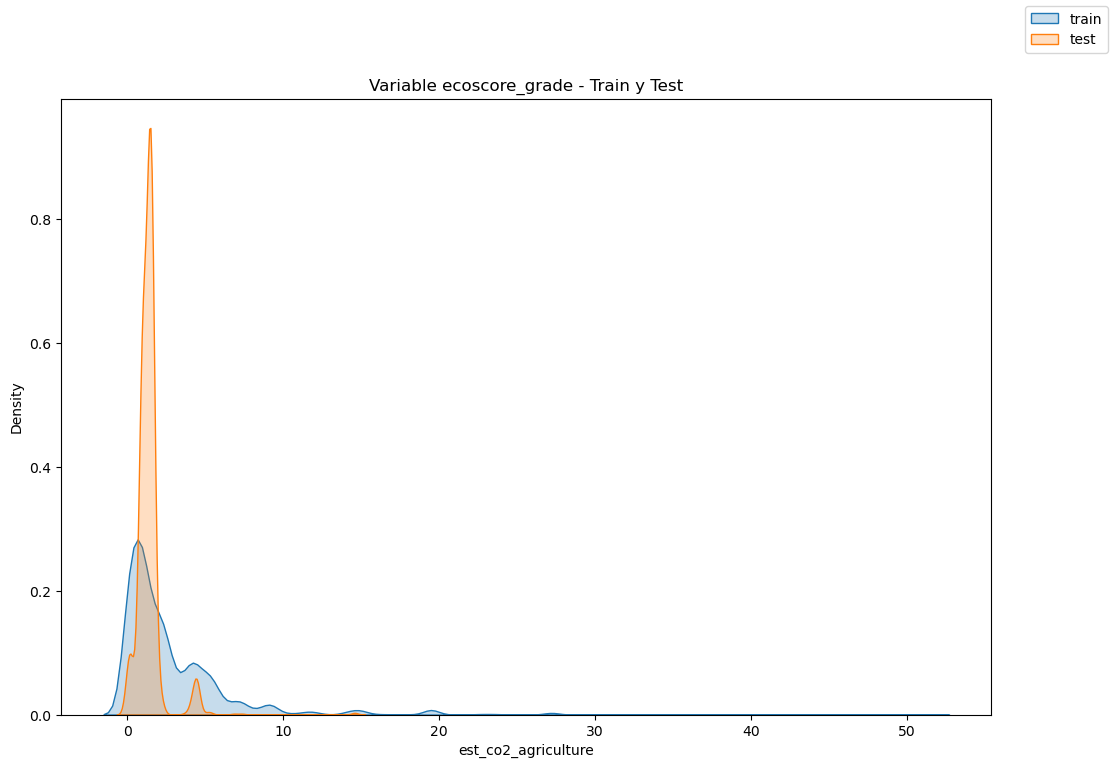

In [96]:
fig = plt.figure(figsize=(12,8))
sns.kdeplot(data=df_train, x='est_co2_agriculture',fill=True)
sns.kdeplot(data=df_test, x='est_co2_agriculture',fill=True)
fig.legend(labels=['train','test'])
plt.title('Variable ecoscore_grade - Train y Test')
plt.show()
     

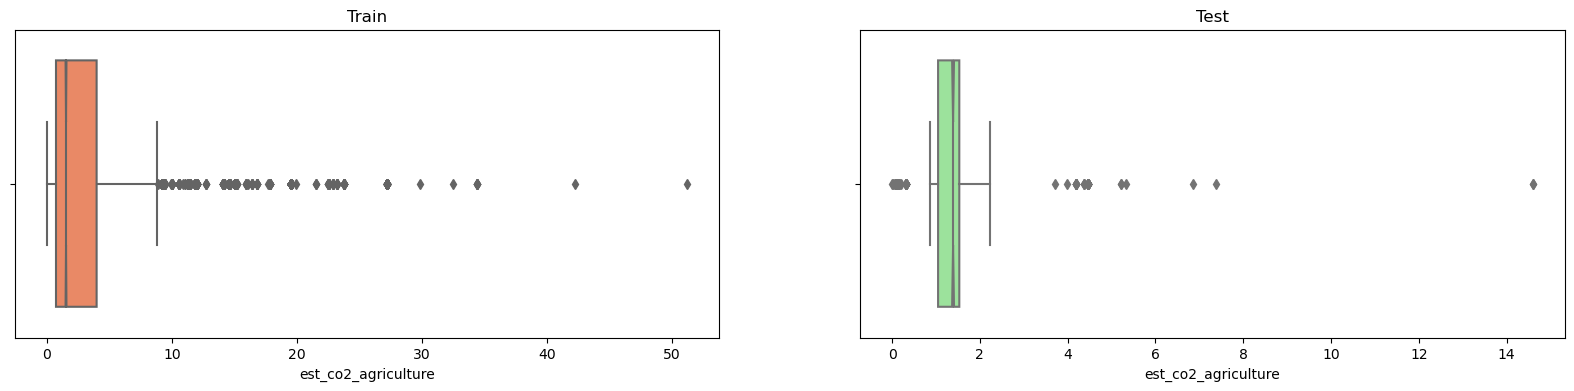

In [97]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(20,4))
sns.boxplot(data=df_train, x="est_co2_agriculture",color='coral',notch=True,ax=axs[0])
sns.boxplot(data=df_test, x="est_co2_agriculture",color='lightgreen',notch=True,ax=axs[1])
axs[0].title.set_text('Train')
axs[1].title.set_text('Test')
plt.show()

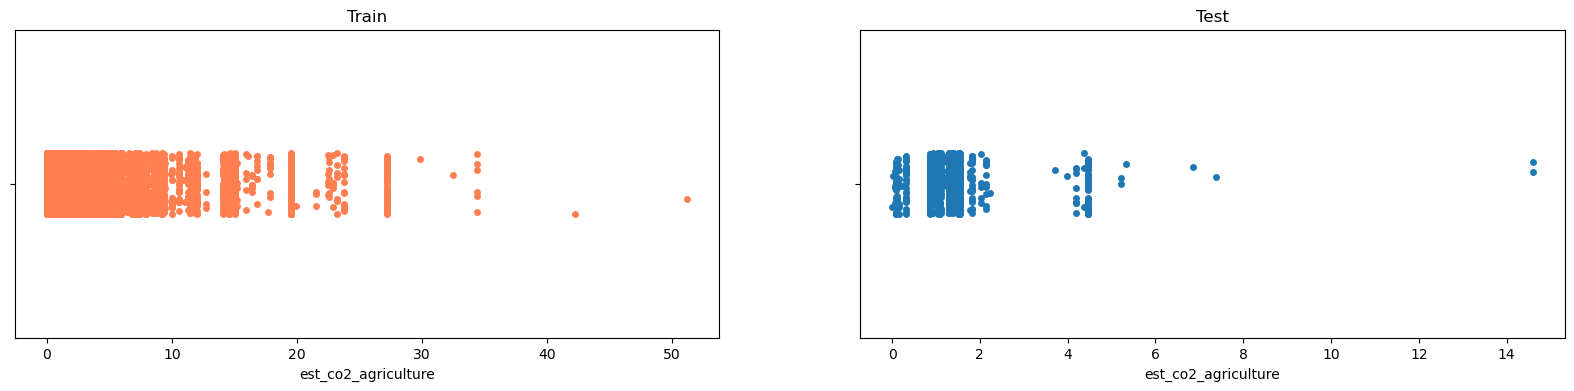

In [98]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(20,4))
sns.stripplot(data=df_train, x="est_co2_agriculture",ax=axs[0],color='coral')
sns.stripplot(data=df_test, x="est_co2_agriculture",ax=axs[1])
axs[0].title.set_text('Train')
axs[1].title.set_text('Test')
plt.show()
     

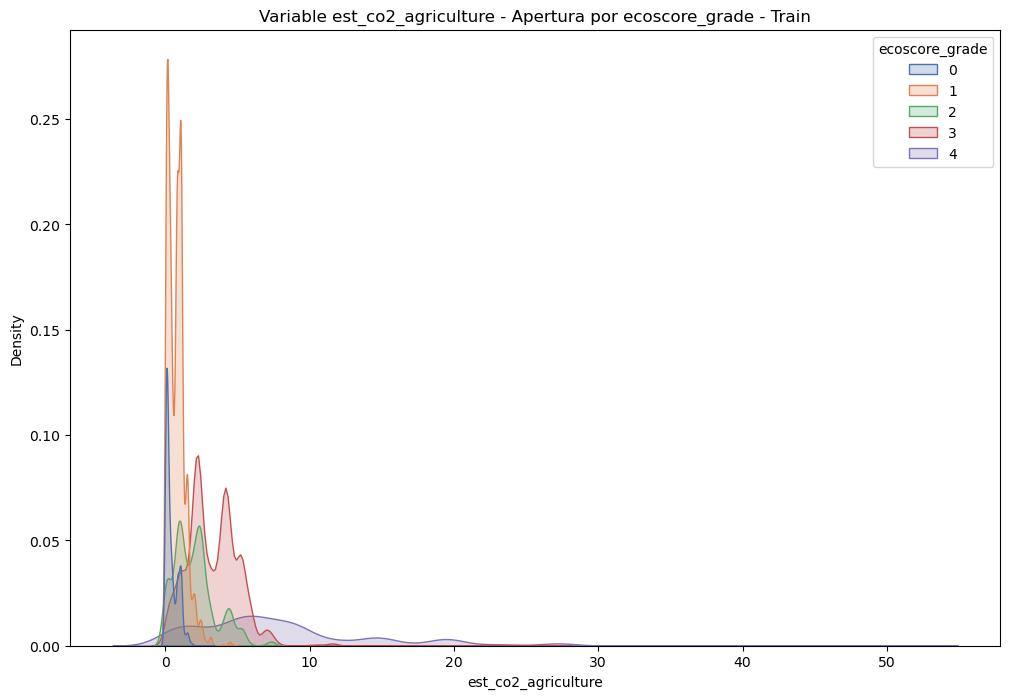

In [99]:
fig = plt.figure(figsize=(12,8))
sns.kdeplot(data=df_train, x="est_co2_agriculture", hue="ecoscore_grade",fill=True,palette="deep")
plt.title('Variable est_co2_agriculture - Apertura por ecoscore_grade - Train')
plt.show()

### 1.1.23 'est_co2_consumption'

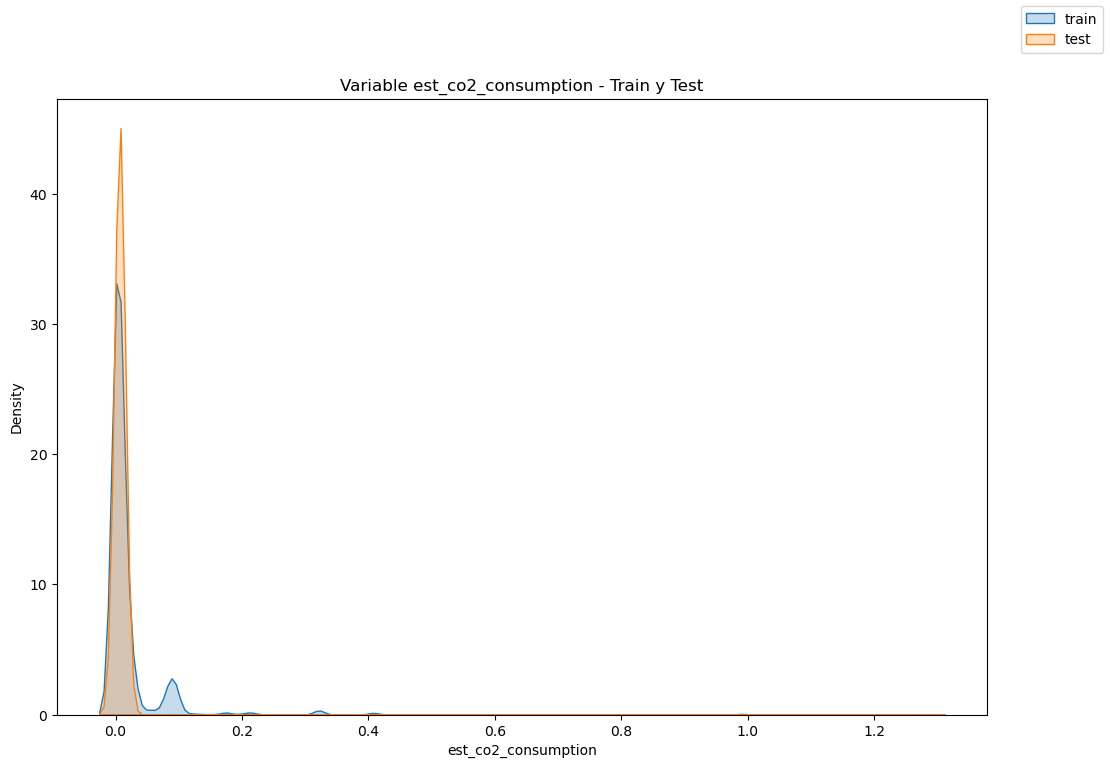

In [100]:
fig = plt.figure(figsize=(12,8))
sns.kdeplot(data=df_train, x='est_co2_consumption',fill=True)
sns.kdeplot(data=df_test, x='est_co2_consumption',fill=True)
fig.legend(labels=['train','test'])
plt.title('Variable est_co2_consumption - Train y Test')
plt.show()
     

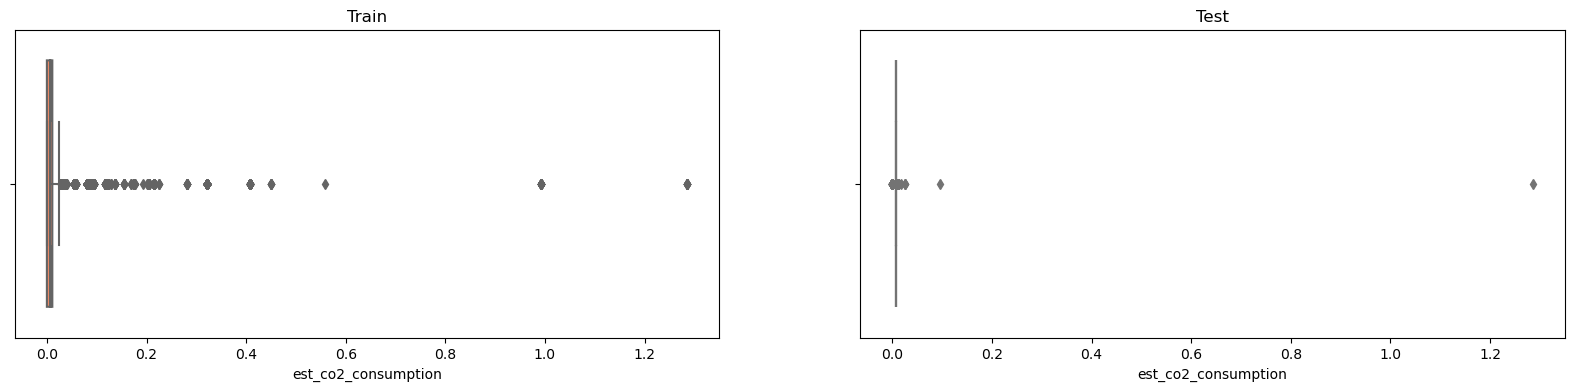

In [101]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(20,4))
sns.boxplot(data=df_train, x="est_co2_consumption",color='coral',notch=True,ax=axs[0])
sns.boxplot(data=df_test, x="est_co2_consumption",color='lightgreen',notch=True,ax=axs[1])
axs[0].title.set_text('Train')
axs[1].title.set_text('Test')
plt.show()

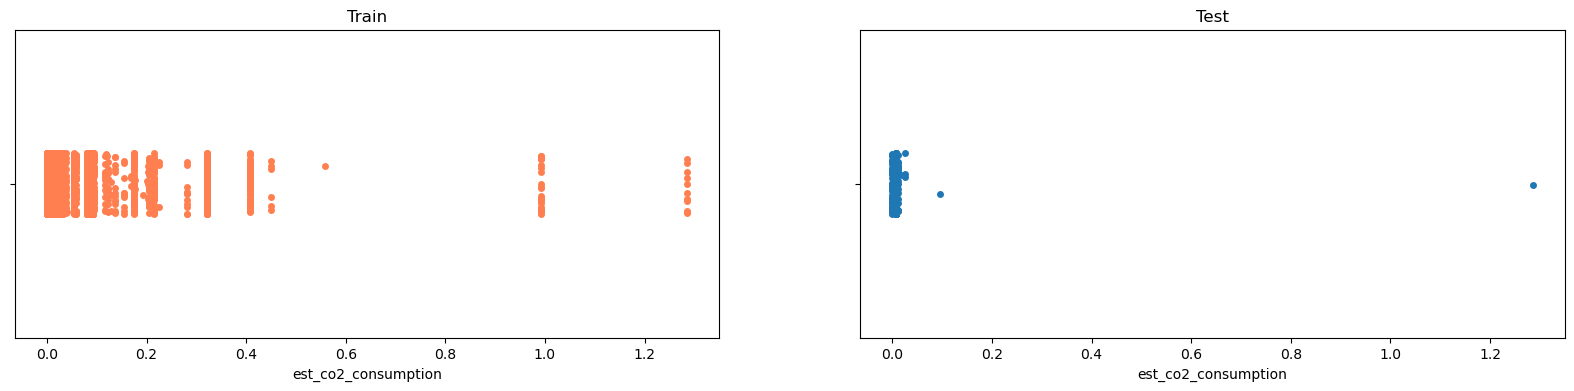

In [102]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(20,4))
sns.stripplot(data=df_train, x="est_co2_consumption",ax=axs[0],color='coral')
sns.stripplot(data=df_test, x="est_co2_consumption",ax=axs[1])
axs[0].title.set_text('Train')
axs[1].title.set_text('Test')
plt.show()
     

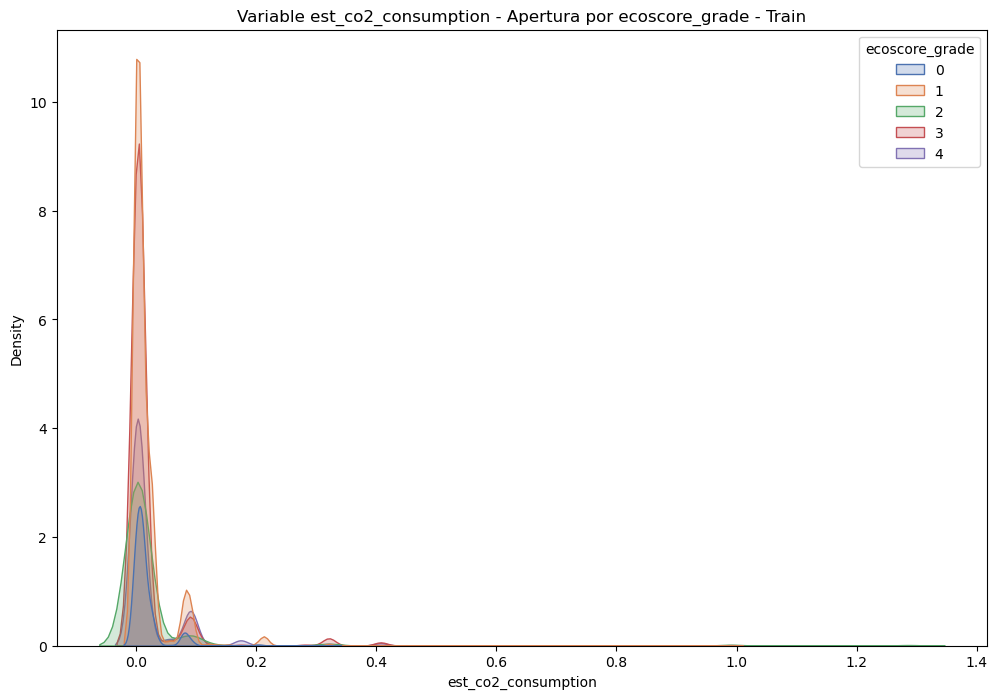

In [103]:
fig = plt.figure(figsize=(12,8))
sns.kdeplot(data=df_train, x="est_co2_consumption", hue="ecoscore_grade",fill=True,palette="deep")
plt.title('Variable est_co2_consumption - Apertura por ecoscore_grade - Train')
plt.show()

### 1.1.24 'est_co2_distribution'

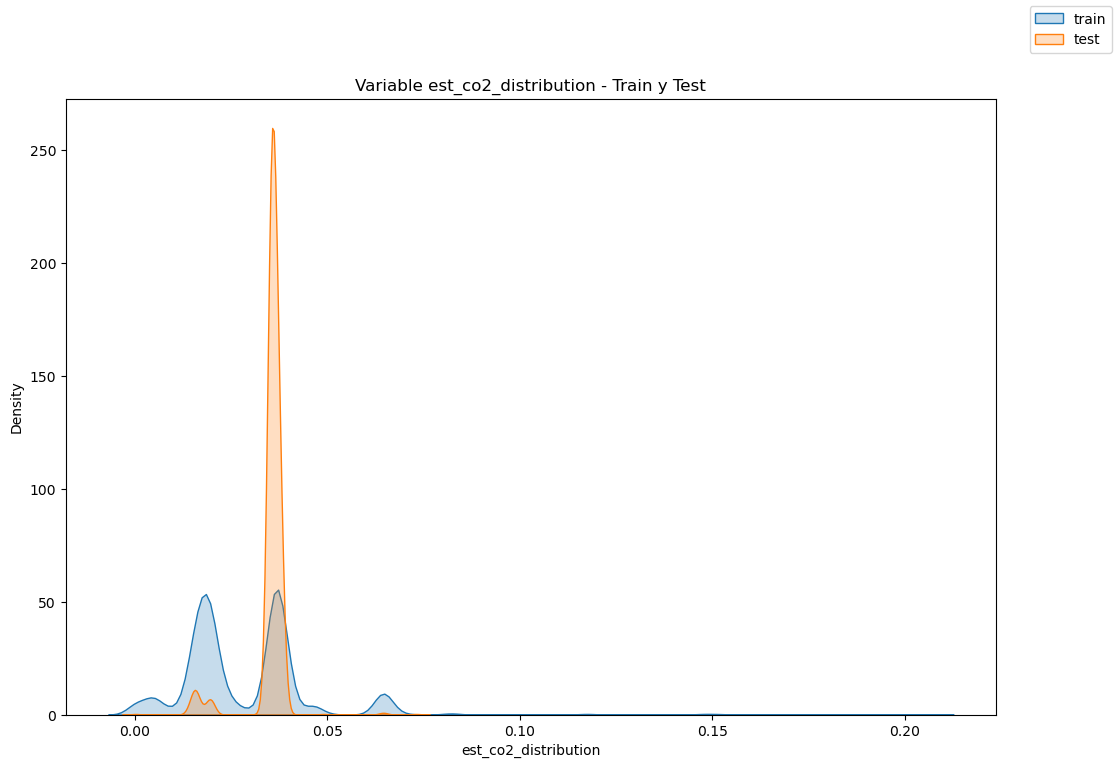

In [104]:
fig = plt.figure(figsize=(12,8))
sns.kdeplot(data=df_train, x='est_co2_distribution',fill=True)
sns.kdeplot(data=df_test, x='est_co2_distribution',fill=True)
fig.legend(labels=['train','test'])
plt.title('Variable est_co2_distribution - Train y Test')
plt.show()
     

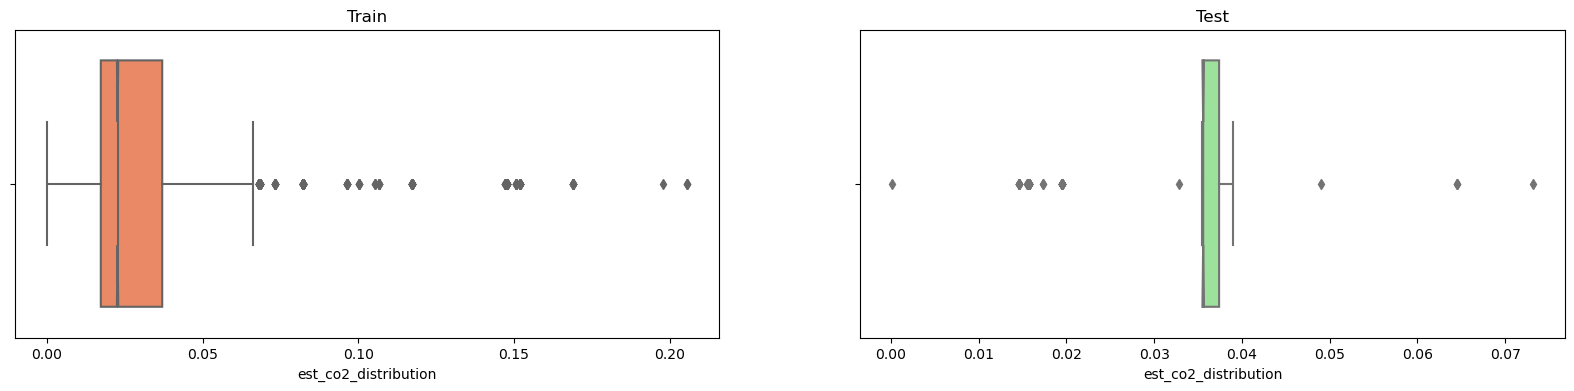

In [105]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(20,4))
sns.boxplot(data=df_train, x="est_co2_distribution",color='coral',notch=True,ax=axs[0])
sns.boxplot(data=df_test, x="est_co2_distribution",color='lightgreen',notch=True,ax=axs[1])
axs[0].title.set_text('Train')
axs[1].title.set_text('Test')
plt.show()

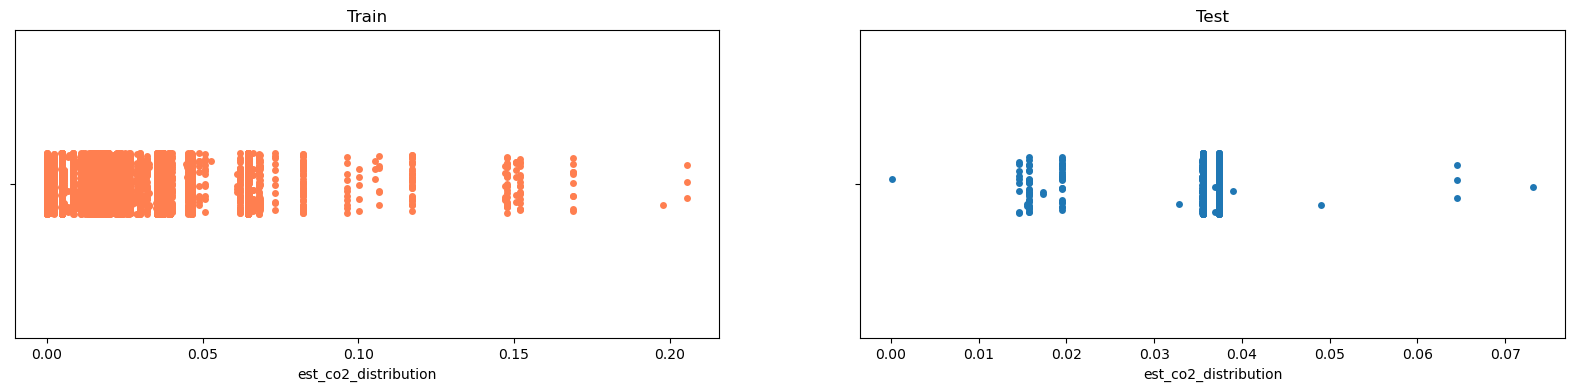

In [106]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(20,4))
sns.stripplot(data=df_train, x="est_co2_distribution",ax=axs[0],color='coral')
sns.stripplot(data=df_test, x="est_co2_distribution",ax=axs[1])
axs[0].title.set_text('Train')
axs[1].title.set_text('Test')
plt.show()
     

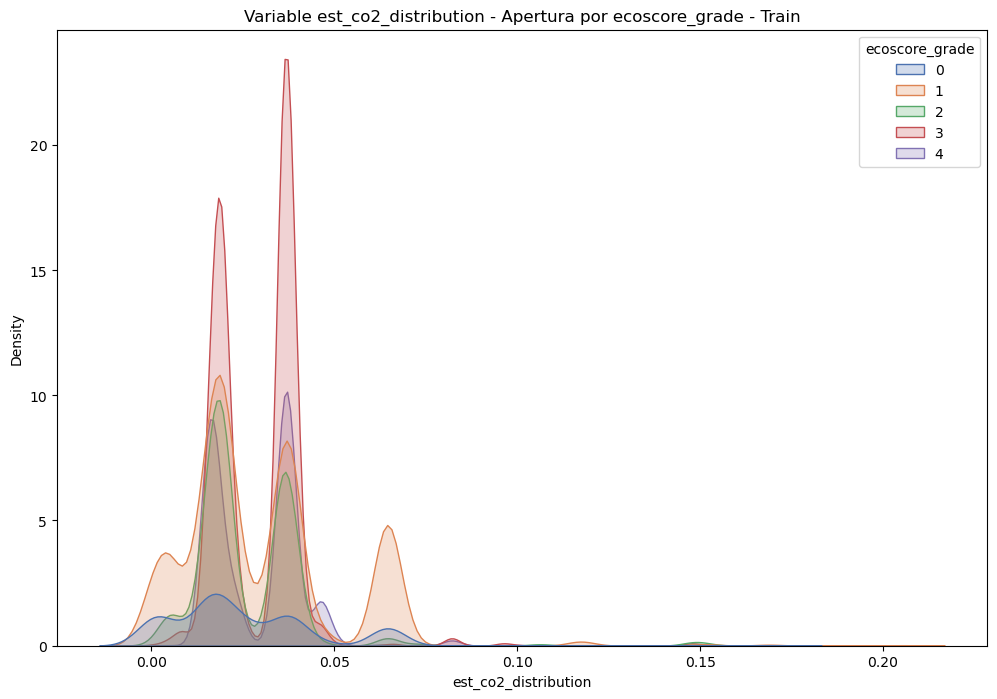

In [107]:
fig = plt.figure(figsize=(12,8))
sns.kdeplot(data=df_train, x="est_co2_distribution", hue="ecoscore_grade",fill=True,palette="deep")
plt.title('Variable est_co2_distribution - Apertura por ecoscore_grade - Train')
plt.show()

### 1.1.25 'est_co2_packaging'

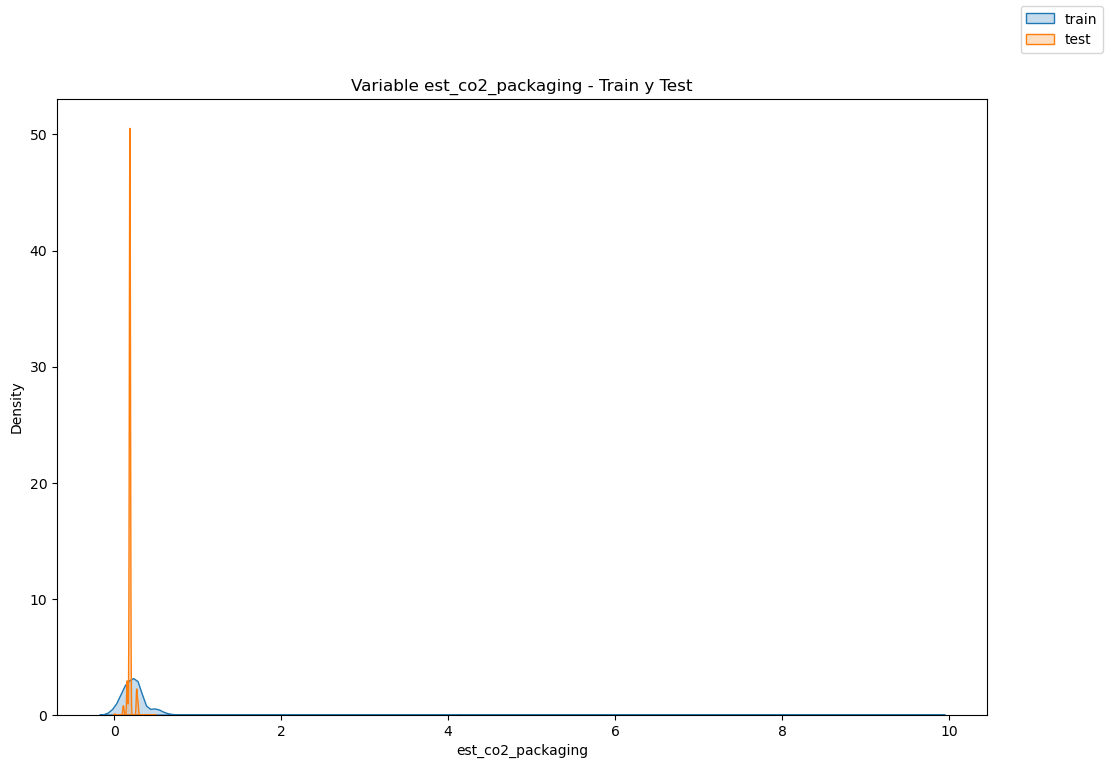

In [108]:
fig = plt.figure(figsize=(12,8))
sns.kdeplot(data=df_train, x='est_co2_packaging',fill=True)
sns.kdeplot(data=df_test, x='est_co2_packaging',fill=True)
fig.legend(labels=['train','test'])
plt.title('Variable est_co2_packaging - Train y Test')
plt.show()
     

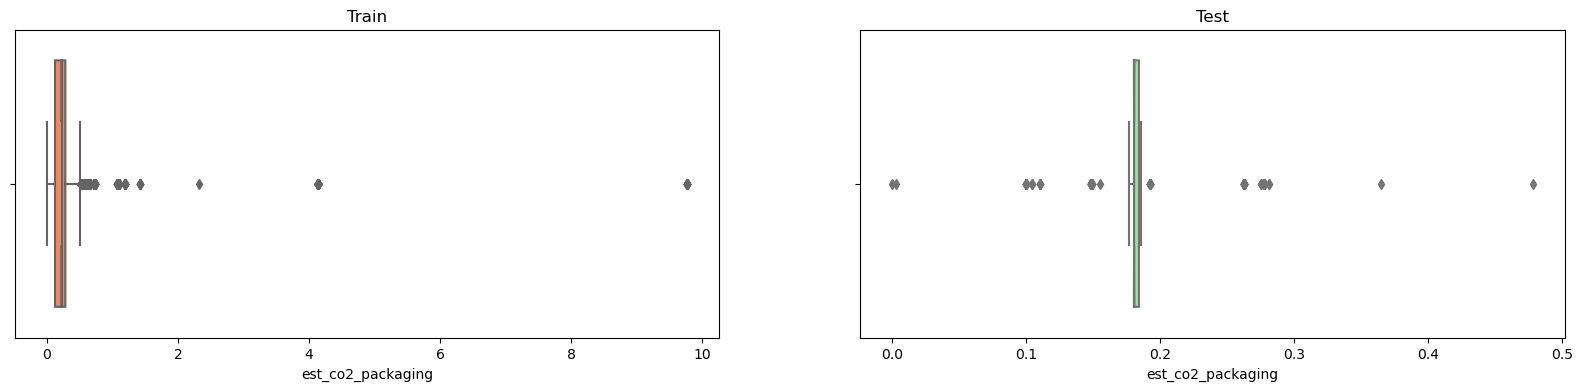

In [109]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(20,4))
sns.boxplot(data=df_train, x="est_co2_packaging",color='coral',notch=True,ax=axs[0])
sns.boxplot(data=df_test, x="est_co2_packaging",color='lightgreen',notch=True,ax=axs[1])
axs[0].title.set_text('Train')
axs[1].title.set_text('Test')
plt.show()

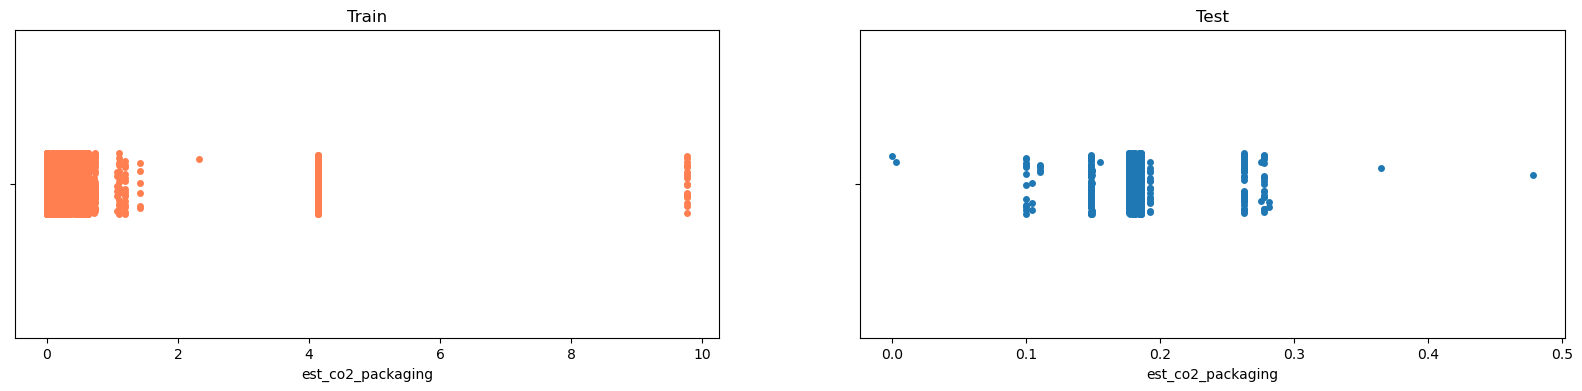

In [110]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(20,4))
sns.stripplot(data=df_train, x="est_co2_packaging",ax=axs[0],color='coral')
sns.stripplot(data=df_test, x="est_co2_packaging",ax=axs[1])
axs[0].title.set_text('Train')
axs[1].title.set_text('Test')
plt.show()
     

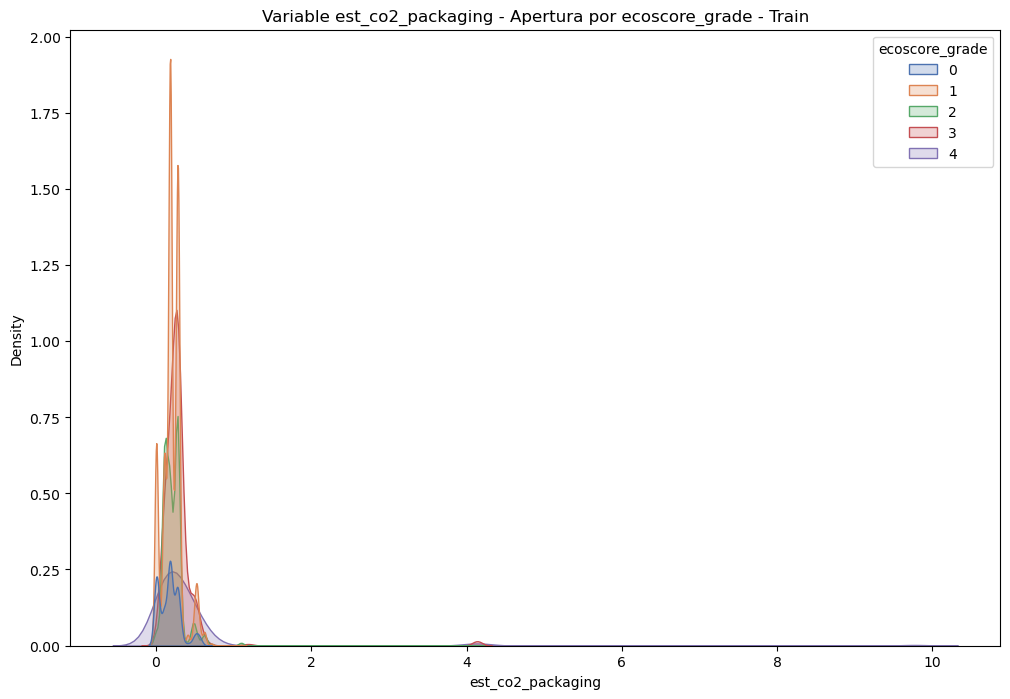

In [111]:
fig = plt.figure(figsize=(12,8))
sns.kdeplot(data=df_train, x="est_co2_packaging", hue="ecoscore_grade",fill=True,palette="deep")
plt.title('Variable est_co2_packaging - Apertura por ecoscore_grade - Train')
plt.show()

### 1.1.26 'est_co2_processing'

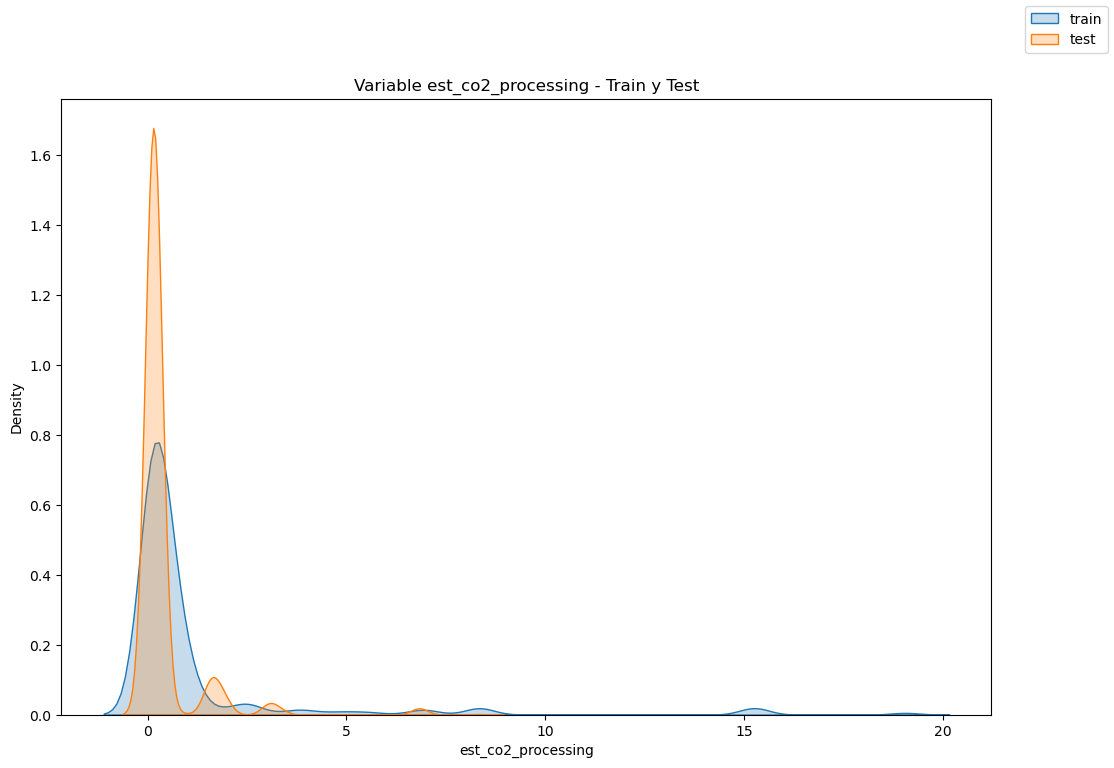

In [112]:
fig = plt.figure(figsize=(12,8))
sns.kdeplot(data=df_train, x='est_co2_processing',fill=True)
sns.kdeplot(data=df_test, x='est_co2_processing',fill=True)
fig.legend(labels=['train','test'])
plt.title('Variable est_co2_processing - Train y Test')
plt.show()
     

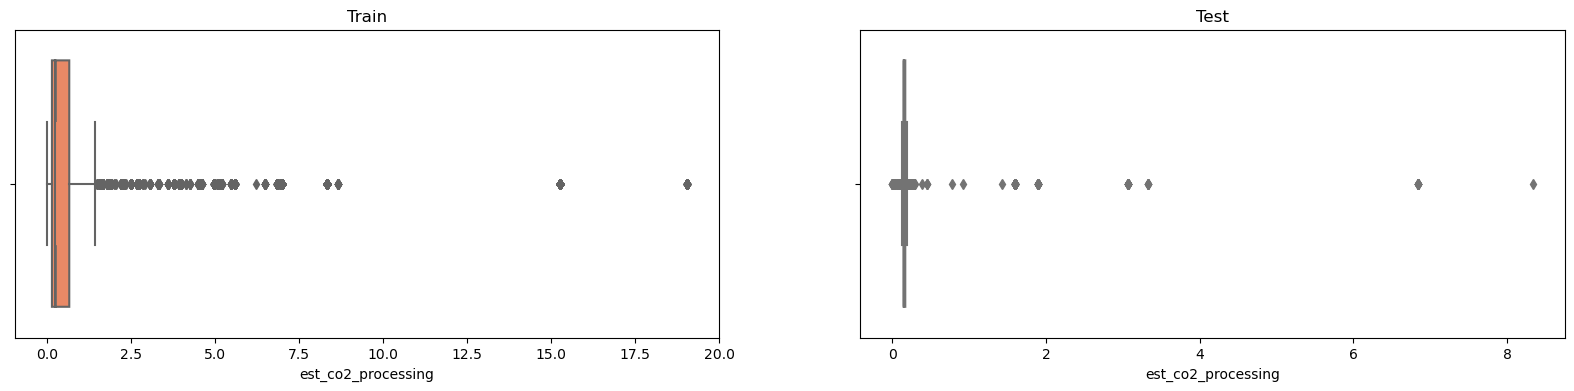

In [113]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(20,4))
sns.boxplot(data=df_train, x="est_co2_processing",color='coral',notch=True,ax=axs[0])
sns.boxplot(data=df_test, x="est_co2_processing",color='lightgreen',notch=True,ax=axs[1])
axs[0].title.set_text('Train')
axs[1].title.set_text('Test')
plt.show()

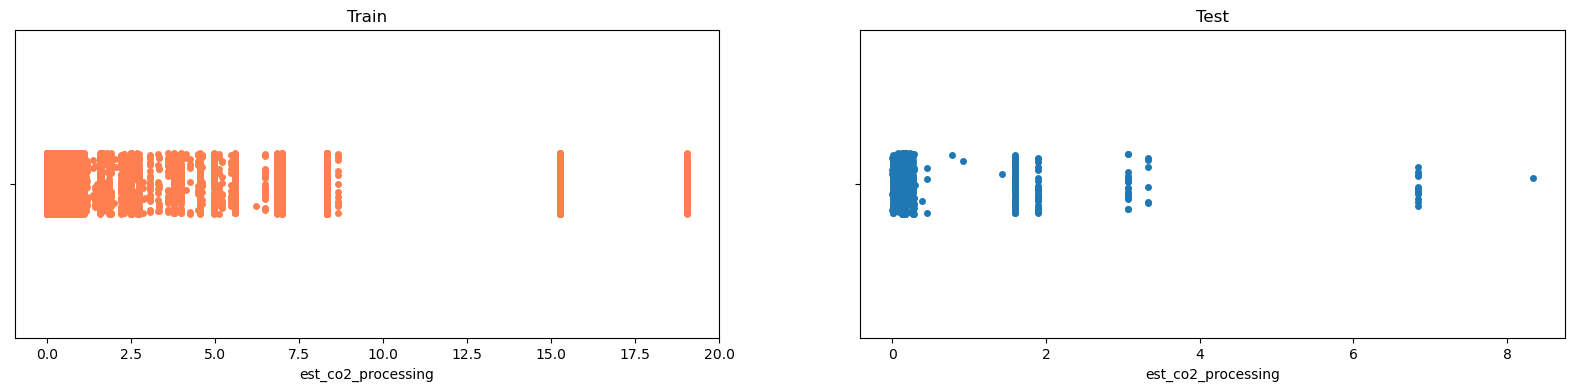

In [114]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(20,4))
sns.stripplot(data=df_train, x="est_co2_processing",ax=axs[0],color='coral')
sns.stripplot(data=df_test, x="est_co2_processing",ax=axs[1])
axs[0].title.set_text('Train')
axs[1].title.set_text('Test')
plt.show()

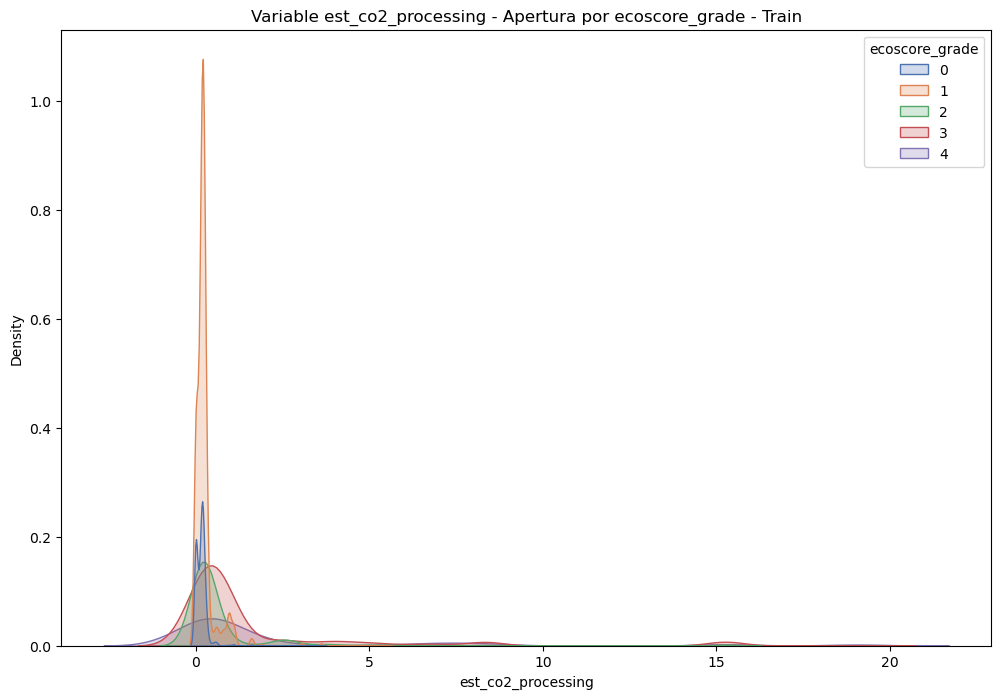

In [115]:
fig = plt.figure(figsize=(12,8))
sns.kdeplot(data=df_train, x="est_co2_processing", hue="ecoscore_grade",fill=True,palette="deep")
plt.title('Variable est_co2_processing - Apertura por ecoscore_grade - Train')
plt.show()

### 1.1.27 'est_co2_transportation'

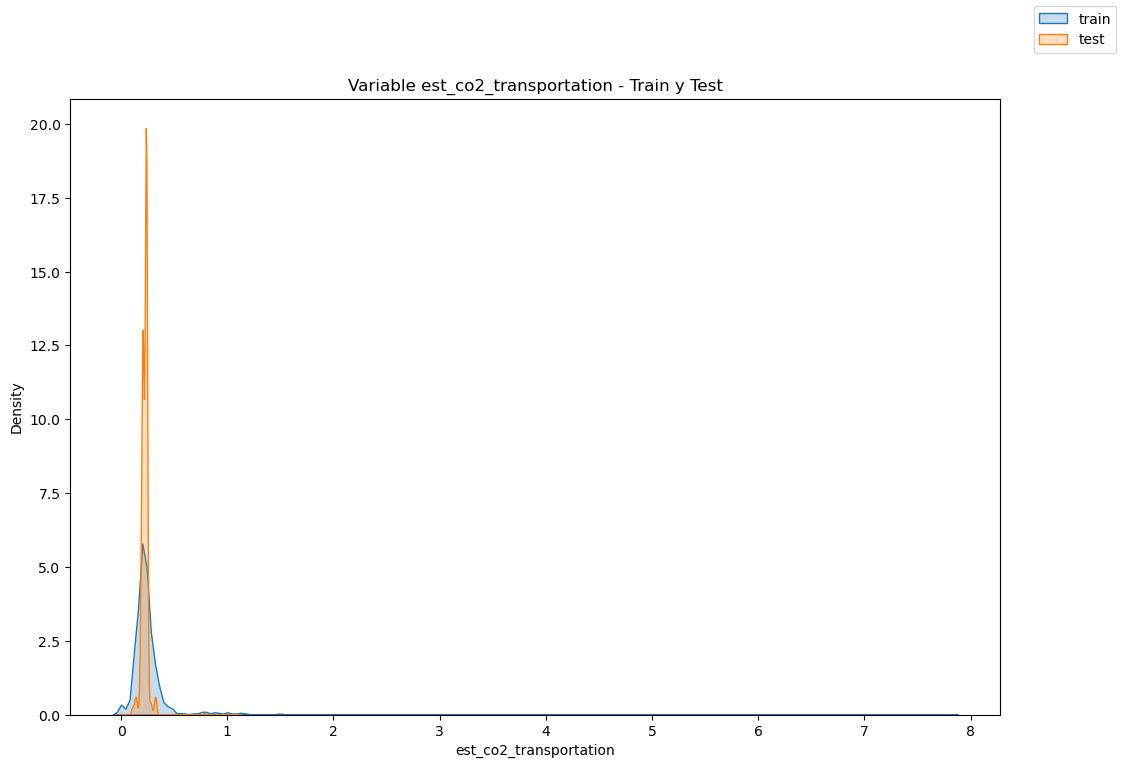

In [116]:
fig = plt.figure(figsize=(12,8))
sns.kdeplot(data=df_train, x='est_co2_transportation',fill=True)
sns.kdeplot(data=df_test, x='est_co2_transportation',fill=True)
fig.legend(labels=['train','test'])
plt.title('Variable est_co2_transportation - Train y Test')
plt.show()
     

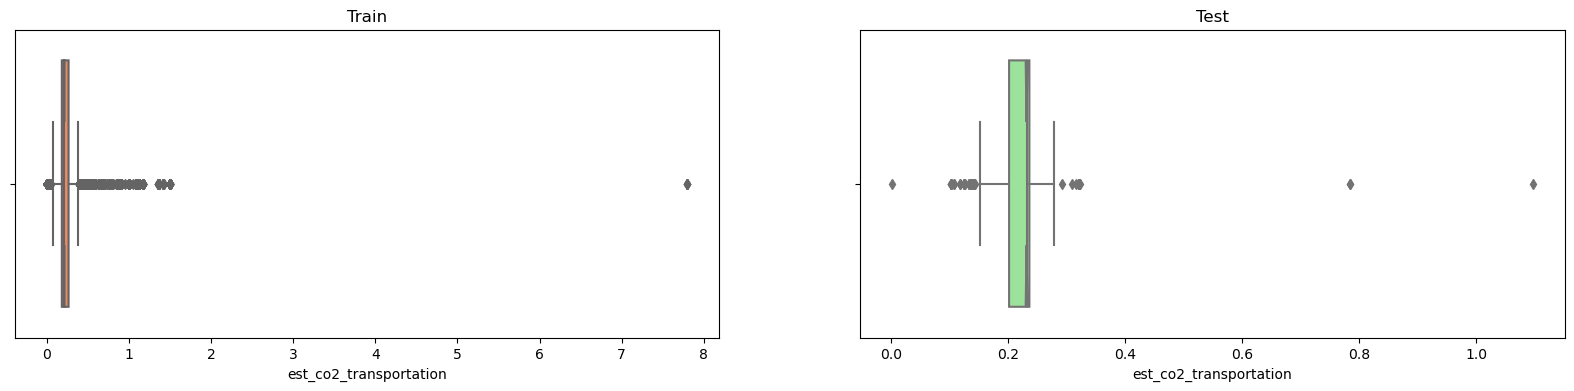

In [117]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(20,4))
sns.boxplot(data=df_train, x="est_co2_transportation",color='coral',notch=True,ax=axs[0])
sns.boxplot(data=df_test, x="est_co2_transportation",color='lightgreen',notch=True,ax=axs[1])
axs[0].title.set_text('Train')
axs[1].title.set_text('Test')
plt.show()

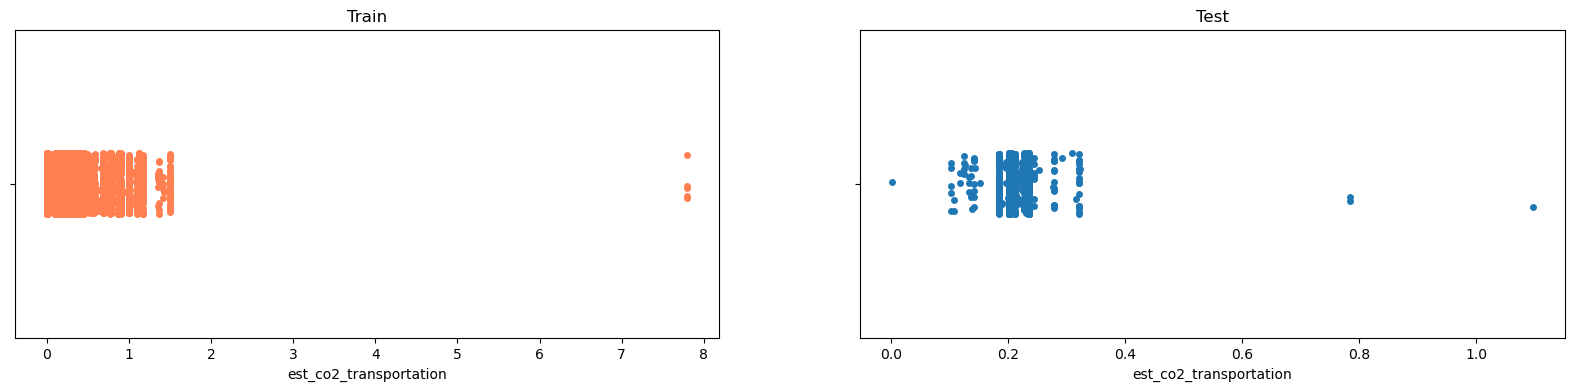

In [118]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(20,4))
sns.stripplot(data=df_train, x="est_co2_transportation",ax=axs[0],color='coral')
sns.stripplot(data=df_test, x="est_co2_transportation",ax=axs[1])
axs[0].title.set_text('Train')
axs[1].title.set_text('Test')
plt.show()

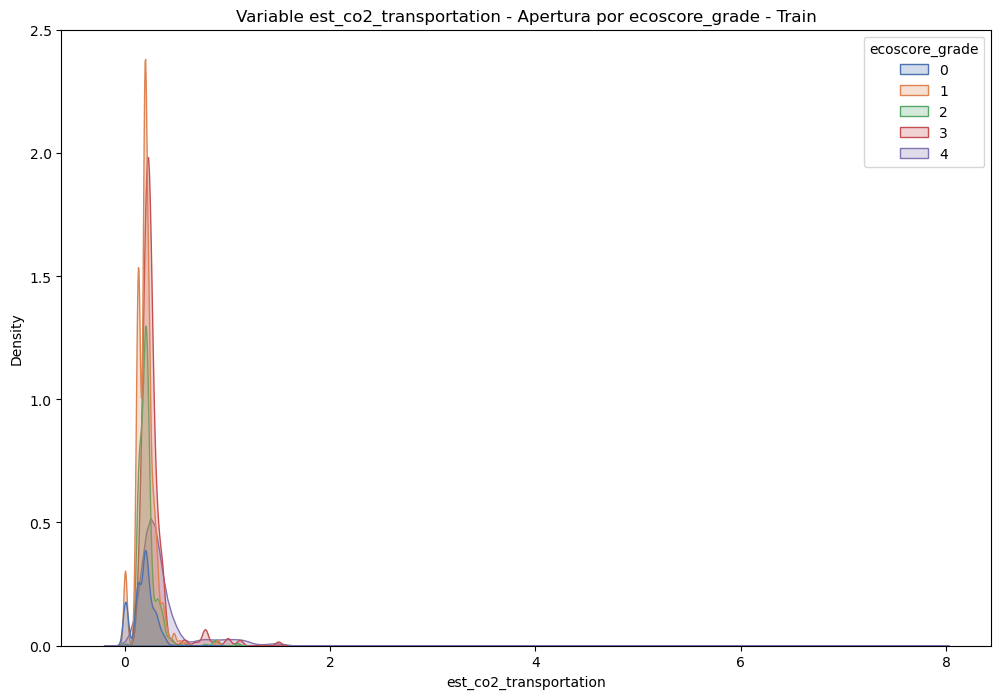

In [119]:
fig = plt.figure(figsize=(12,8))
sns.kdeplot(data=df_train, x="est_co2_transportation", hue="ecoscore_grade",fill=True,palette="deep")
plt.title('Variable est_co2_transportation - Apertura por ecoscore_grade - Train')
plt.show()

# 2 Modelado

### 2.1  Features Numericos

In [120]:
#Train
columnas_reducidas_train = ['non_recyclable_and_non_biodegradable_materials_count',
                            'est_co2_agriculture', 
                            'est_co2_consumption', 
                            'est_co2_distribution',
                            'est_co2_packaging', 
                            'est_co2_processing', 
                            'est_co2_transportation',
                            'ecoscore_grade']

In [121]:
#Test 
columnas_reducidas_test = ['non_recyclable_and_non_biodegradable_materials_count',
                           'est_co2_agriculture', 
                           'est_co2_consumption', 
                           'est_co2_distribution',
                           'est_co2_packaging', 
                           'est_co2_processing', 
                           'est_co2_transportation']

In [122]:
df_train_reducido = df_train[columnas_reducidas_train]
df_train_reducido

,non_recyclable_and_non_biodegradable_materials_count,est_co2_agriculture,est_co2_consumption,est_co2_distribution,est_co2_packaging,est_co2_processing,est_co2_transportation,ecoscore_grade
0,1,1.405794,0.122097,0.151978,0.400866,0.123400,0.344651,2
1,1,1.772009,0.000000,0.019531,0.288156,5.215055,0.171567,3
2,1,2.239600,0.000000,0.019531,0.281596,0.770511,0.252874,3
3,1,4.536405,0.006688,0.037393,0.185784,0.458632,0.217118,3
4,0,7.918371,0.000000,0.015709,0.478390,0.445327,0.334988,4
...,...,...,...,...,...,...,...,...
20830,1,0.124785,0.000000,0.015377,0.100104,0.116079,0.145580,1
20831,1,19.495674,0.000000,0.015709,0.100104,6.998544,0.456216,4
20832,1,1.463891,0.000000,0.017321,0.104294,15.259235,0.265547,4
20833,1,7.304731,0.006688,0.039033,0.180553,0.056470,0.233556,3


In [123]:
df_test_reducido = df_test[columnas_reducidas_test]
df_test_reducido

,non_recyclable_and_non_biodegradable_materials_count,est_co2_agriculture,est_co2_consumption,est_co2_distribution,est_co2_packaging,est_co2_processing,est_co2_transportation
0,1,0.868335,0.006688,0.035574,0.177032,0.168338,0.201667
1,1,0.091307,0.006688,0.035436,0.177799,0.059533,0.190374
2,1,1.530274,0.006688,0.035574,0.180553,0.148688,0.236482
3,1,1.545345,0.006688,0.035574,0.180553,0.150069,0.201779
4,0,1.046470,0.006688,0.037393,0.184222,0.163641,0.234002
...,...,...,...,...,...,...,...
1267,1,1.530274,0.006688,0.035574,0.180553,0.148688,0.236482
1268,1,1.121355,0.006688,0.035574,0.148287,0.011249,0.205154
1269,1,0.868335,0.006688,0.035574,0.180553,0.168338,0.201667
1270,1,4.456254,0.006688,0.035574,0.262661,0.262596,0.211504


Text(0.5, 1.0, 'Correlation Heatmap')

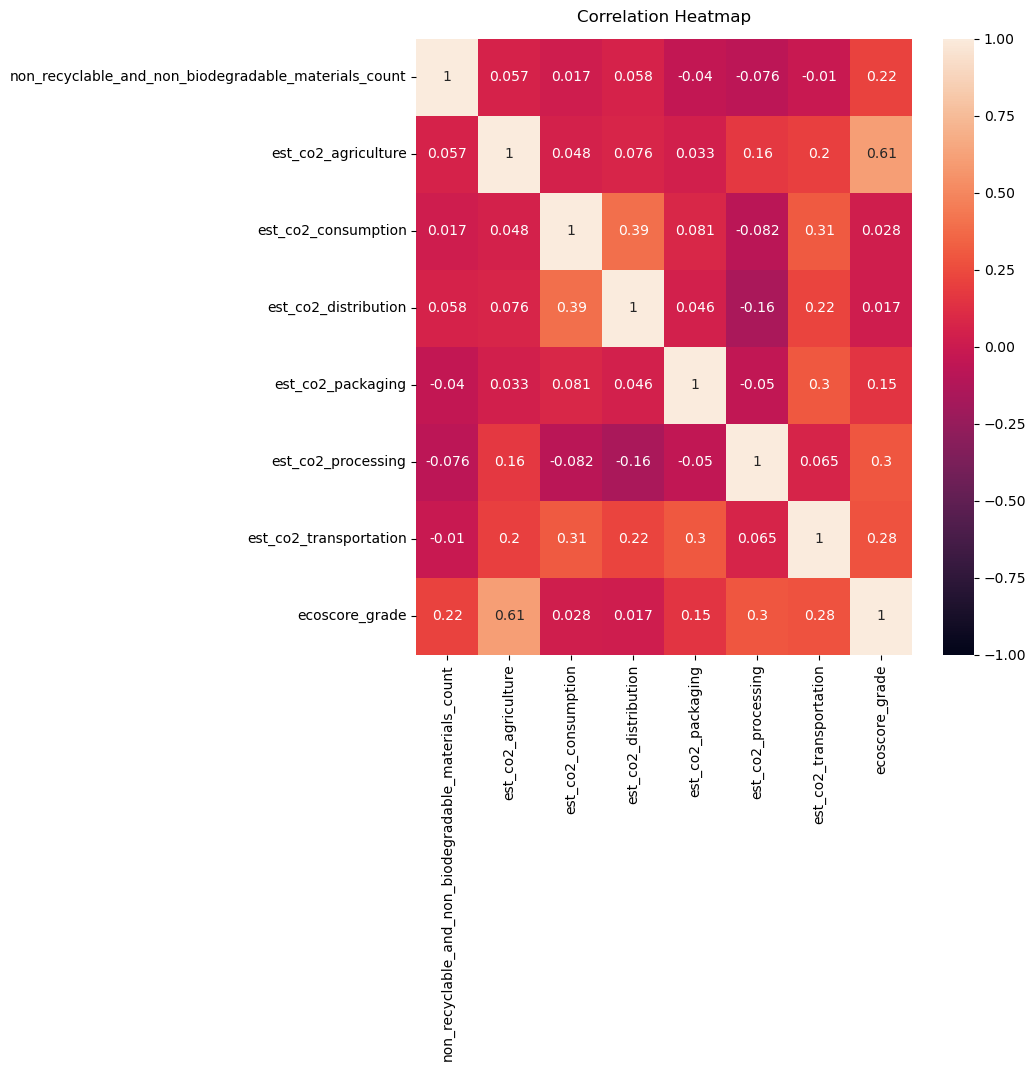

In [124]:
#Grafico de correlacion

plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(df_train_reducido.corr(method='pearson'), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [125]:
#Target  - Correlacion de Pearson con los Features

df_train_reducido.corr()['ecoscore_grade'].sort_values(ascending=False)

ecoscore_grade                                          1.000000
est_co2_agriculture                                     0.605586
est_co2_processing                                      0.296179
est_co2_transportation                                  0.277857
non_recyclable_and_non_biodegradable_materials_count    0.216469
est_co2_packaging                                       0.149161
est_co2_consumption                                     0.028201
est_co2_distribution                                    0.017119
Name: ecoscore_grade, dtype: float64

## 2.2 Conjuntos de datos

### 2.1.1 Train y Validation

In [126]:
#Modelo de Clasificacion - Features + Target

X_clf = df_train_reducido.loc[:, ~df_train_reducido.columns.isin(['ecoscore_grade'])]
X_clf

,non_recyclable_and_non_biodegradable_materials_count,est_co2_agriculture,est_co2_consumption,est_co2_distribution,est_co2_packaging,est_co2_processing,est_co2_transportation
0,1,1.405794,0.122097,0.151978,0.400866,0.123400,0.344651
1,1,1.772009,0.000000,0.019531,0.288156,5.215055,0.171567
2,1,2.239600,0.000000,0.019531,0.281596,0.770511,0.252874
3,1,4.536405,0.006688,0.037393,0.185784,0.458632,0.217118
4,0,7.918371,0.000000,0.015709,0.478390,0.445327,0.334988
...,...,...,...,...,...,...,...
20830,1,0.124785,0.000000,0.015377,0.100104,0.116079,0.145580
20831,1,19.495674,0.000000,0.015709,0.100104,6.998544,0.456216
20832,1,1.463891,0.000000,0.017321,0.104294,15.259235,0.265547
20833,1,7.304731,0.006688,0.039033,0.180553,0.056470,0.233556


In [127]:
#Se incorporan las aperturas de la variable 'packaging_materials'

X_clf['packaging_materials_0'] = df_train['packaging_materials'].str[0].fillna('')
X_clf['packaging_materials_1'] = df_train['packaging_materials'].str[1].fillna('')
X_clf['packaging_materials_2'] = df_train['packaging_materials'].str[2].fillna('')
X_clf['packaging_materials_3'] = df_train['packaging_materials'].str[3].fillna('')
X_clf['packaging_materials_4'] = df_train['packaging_materials'].str[4].fillna('')
X_clf

,non_recyclable_and_non_biodegradable_materials_count,est_co2_agriculture,est_co2_consumption,est_co2_distribution,est_co2_packaging,est_co2_processing,est_co2_transportation,packaging_materials_0,packaging_materials_1,packaging_materials_2,packaging_materials_3,packaging_materials_4
0,1,1.405794,0.122097,0.151978,0.400866,0.123400,0.344651,en:plastic,,,,
1,1,1.772009,0.000000,0.019531,0.288156,5.215055,0.171567,en:cardboard,en:plastic,,,
2,1,2.239600,0.000000,0.019531,0.281596,0.770511,0.252874,en:paperboard,en:plastic,,,
3,1,4.536405,0.006688,0.037393,0.185784,0.458632,0.217118,en:plastic,,,,
4,0,7.918371,0.000000,0.015709,0.478390,0.445327,0.334988,en:glass,en:plastic,en:unknown,,
...,...,...,...,...,...,...,...,...,...,...,...,...
20830,1,0.124785,0.000000,0.015377,0.100104,0.116079,0.145580,en:unknown,,,,
20831,1,19.495674,0.000000,0.015709,0.100104,6.998544,0.456216,en:unknown,,,,
20832,1,1.463891,0.000000,0.017321,0.104294,15.259235,0.265547,en:unknown,,,,
20833,1,7.304731,0.006688,0.039033,0.180553,0.056470,0.233556,en:plastic,,,,


In [128]:
#Modelo de Clasificacion - Target

y_clf = df_train_reducido['ecoscore_grade']
y_clf

0        2
1        3
2        3
3        3
4        4
        ..
20830    1
20831    4
20832    4
20833    3
20834    3
Name: ecoscore_grade, Length: 20835, dtype: int64

In [129]:
#Realizo la separacion en Train / Validation en forma estratificada con respecto al Target

X_clf_train, X_clf_val, y_clf_train, y_clf_val = train_test_split(X_clf,y_clf, test_size=0.20, random_state=42,stratify=y_clf)

In [130]:
X_clf_train.shape

(16668, 12)

In [131]:
X_clf_val.shape

(4167, 12)

In [132]:
y_clf_train.shape

(16668,)

In [133]:
y_clf_val.shape

(4167,)

### 2.1.2 Test

In [134]:
X_test = df_test_reducido
X_test

,non_recyclable_and_non_biodegradable_materials_count,est_co2_agriculture,est_co2_consumption,est_co2_distribution,est_co2_packaging,est_co2_processing,est_co2_transportation
0,1,0.868335,0.006688,0.035574,0.177032,0.168338,0.201667
1,1,0.091307,0.006688,0.035436,0.177799,0.059533,0.190374
2,1,1.530274,0.006688,0.035574,0.180553,0.148688,0.236482
3,1,1.545345,0.006688,0.035574,0.180553,0.150069,0.201779
4,0,1.046470,0.006688,0.037393,0.184222,0.163641,0.234002
...,...,...,...,...,...,...,...
1267,1,1.530274,0.006688,0.035574,0.180553,0.148688,0.236482
1268,1,1.121355,0.006688,0.035574,0.148287,0.011249,0.205154
1269,1,0.868335,0.006688,0.035574,0.180553,0.168338,0.201667
1270,1,4.456254,0.006688,0.035574,0.262661,0.262596,0.211504


In [135]:
#Se incorporan las aperturas de la variable 'packaging_materials'

X_test['packaging_materials_0'] = df_test['packaging_materials'].str[0].fillna('')
X_test['packaging_materials_1'] = df_test['packaging_materials'].str[1].fillna('')
X_test['packaging_materials_2'] = df_test['packaging_materials'].str[2].fillna('')
X_test['packaging_materials_3'] = df_test['packaging_materials'].str[3].fillna('')
X_test['packaging_materials_4'] = df_test['packaging_materials'].str[4].fillna('')
X_test

,non_recyclable_and_non_biodegradable_materials_count,est_co2_agriculture,est_co2_consumption,est_co2_distribution,est_co2_packaging,est_co2_processing,est_co2_transportation,packaging_materials_0,packaging_materials_1,packaging_materials_2,packaging_materials_3,packaging_materials_4
0,1,0.868335,0.006688,0.035574,0.177032,0.168338,0.201667,en:plastic,,,,
1,1,0.091307,0.006688,0.035436,0.177799,0.059533,0.190374,en:unknown,,,,
2,1,1.530274,0.006688,0.035574,0.180553,0.148688,0.236482,en:plastic,,,,
3,1,1.545345,0.006688,0.035574,0.180553,0.150069,0.201779,en:plastic,,,,
4,0,1.046470,0.006688,0.037393,0.184222,0.163641,0.234002,en:hdpe-high-density-polyethylene,en:ldpe-low-density-polyethylene,en:heavy-aluminium,,
...,...,...,...,...,...,...,...,...,...,...,...,...
1267,1,1.530274,0.006688,0.035574,0.180553,0.148688,0.236482,en:plastic,,,,
1268,1,1.121355,0.006688,0.035574,0.148287,0.011249,0.205154,en:plastic,,,,
1269,1,0.868335,0.006688,0.035574,0.180553,0.168338,0.201667,en:unknown,,,,
1270,1,4.456254,0.006688,0.035574,0.262661,0.262596,0.211504,en:unknown,,,,


## 2.3 Entrenamiento del Modelo

Para el desarrollo de los modelos utilizo la libreria Catboost https://catboost.ai/en/docs/ la cual implementa **gradient boosting on decision trees** y cuenta con ciertas ventajas iniciales como el manejo de variables categoricas sin la necesidad de su transformacion (encoding) previa al antrenamiento de los modelos.

A continuacion se realiza la instalacion de la libreria Catboost

In [136]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


Luego de la busqueda de **Hiperparametros** (GridsearchCv + Pruebas Puntuales) utilizando los conjuntos de datos **X_clf_train, X_clf_val, y_clf_train, y_clf_val** el siguiente listado de hiperparametros son los utilizados para el entrenamiento del Modelo de Clasificacion con la totalidad de los datos de Train **X_clf** e **y_clf**

In [137]:
#Modelo de Clasificacion - Importo la clase de Catboost

from catboost import CatBoostClassifier

In [138]:
#Modelo de Clasificacion - Hiperparametros - Entrenamiento
catboost_params_clf = {'iterations' : 800,
                       'learning_rate' : 0.06,
                       'depth': 16,
                       'bootstrap_type' : 'Bernoulli',
                       'random_strength': 2,
                       'min_data_in_leaf': 50,
                       'l2_leaf_reg': 3,
                       'grow_policy' : 'Depthwise',
                       'metric_period' : 50,
                       'verbose' : 50,
                       'subsample' : 0.8,
                       'random_seed' : 0,
                       'early_stopping_rounds':20}

In [139]:
#Features categoricos
categorical_features = ['packaging_materials_0', 
                        'packaging_materials_1',
                        'packaging_materials_2', 
                        'packaging_materials_3',
                        'packaging_materials_4']

In [140]:
#Instanciamos el modelo con los hiperparametros definidos previamente
catboost_clf = CatBoostClassifier(**catboost_params_clf,loss_function='MultiClass')

#Realizamos en entrenamiento final del Modelo de Clasificacion
catboost_clf.fit(X_clf,y_clf,cat_features=categorical_features)

0:	learn: 1.5028065	total: 246ms	remaining: 3m 16s
50:	learn: 0.5133923	total: 8.64s	remaining: 2m 6s
100:	learn: 0.4340628	total: 15.7s	remaining: 1m 48s
150:	learn: 0.4021921	total: 22.4s	remaining: 1m 36s
200:	learn: 0.3569442	total: 29.8s	remaining: 1m 28s
250:	learn: 0.3222879	total: 36.6s	remaining: 1m 20s
300:	learn: 0.3071907	total: 43s	remaining: 1m 11s
350:	learn: 0.2936323	total: 49.7s	remaining: 1m 3s
400:	learn: 0.2839843	total: 56.4s	remaining: 56.1s
450:	learn: 0.2735779	total: 1m 3s	remaining: 49.2s
500:	learn: 0.2652818	total: 1m 10s	remaining: 42s
550:	learn: 0.2571275	total: 1m 17s	remaining: 35s
600:	learn: 0.2497198	total: 1m 24s	remaining: 28s
650:	learn: 0.2434913	total: 1m 32s	remaining: 21.1s
700:	learn: 0.2375109	total: 1m 39s	remaining: 14.1s
750:	learn: 0.2321222	total: 1m 47s	remaining: 6.99s
799:	learn: 0.2274272	total: 1m 54s	remaining: 0us


In [141]:
#Modelo de Clasificacion - Feature Importance
feature_importance = pd.DataFrame([catboost_clf.feature_names_,catboost_clf.feature_importances_]).T
feature_importance.columns=['Features','Feature Importance - Value']
feature_importance

,Features,Feature Importance - Value
0,non_recyclable_and_non_biodegradable_materials...,10.212015
1,est_co2_agriculture,40.041794
2,est_co2_consumption,3.019807
3,est_co2_distribution,6.586796
4,est_co2_packaging,6.560588
5,est_co2_processing,11.020449
6,est_co2_transportation,12.299669
7,packaging_materials_0,6.71523
8,packaging_materials_1,2.843923
9,packaging_materials_2,0.59216


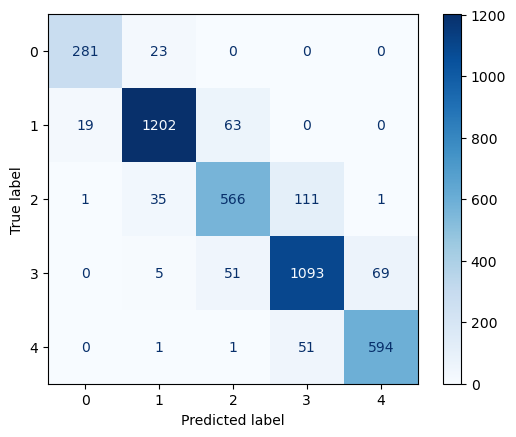

In [142]:
#Matriz de confusion
ConfusionMatrixDisplay.from_estimator(
        catboost_clf,
        X_clf_val,
        y_clf_val,
        cmap=plt.cm.Blues,
    )

In [143]:
#Predicciones - Dataframe
clases_clf = pd.Series(catboost_clf.predict(X_test)[:,0],name='target')
clases_clf.to_frame()

,target
0,1
1,2
2,1
3,1
4,3
...,...
1267,1
1268,1
1269,1
1270,3


In [144]:
#Predicciones - JSON
result = clases_clf.to_frame().to_json()
result

'{"target":{"0":1,"1":2,"2":1,"3":1,"4":3,"5":0,"6":1,"7":3,"8":1,"9":1,"10":1,"11":1,"12":1,"13":1,"14":3,"15":1,"16":1,"17":0,"18":1,"19":1,"20":1,"21":3,"22":1,"23":3,"24":1,"25":1,"26":1,"27":1,"28":1,"29":1,"30":1,"31":1,"32":1,"33":2,"34":1,"35":1,"36":2,"37":1,"38":0,"39":1,"40":2,"41":1,"42":1,"43":1,"44":1,"45":0,"46":1,"47":1,"48":1,"49":3,"50":1,"51":1,"52":3,"53":1,"54":4,"55":1,"56":1,"57":0,"58":3,"59":3,"60":4,"61":1,"62":1,"63":1,"64":1,"65":0,"66":1,"67":1,"68":1,"69":1,"70":0,"71":1,"72":1,"73":1,"74":3,"75":1,"76":1,"77":4,"78":1,"79":1,"80":2,"81":1,"82":4,"83":1,"84":2,"85":3,"86":1,"87":1,"88":3,"89":1,"90":4,"91":1,"92":2,"93":1,"94":1,"95":1,"96":1,"97":1,"98":2,"99":1,"100":1,"101":1,"102":1,"103":1,"104":1,"105":0,"106":1,"107":1,"108":1,"109":1,"110":1,"111":3,"112":1,"113":3,"114":2,"115":1,"116":3,"117":1,"118":1,"119":1,"120":1,"121":1,"122":4,"123":1,"124":1,"125":1,"126":1,"127":3,"128":1,"129":1,"130":4,"131":3,"132":3,"133":0,"134":1,"135":1,"136":3,"1

In [145]:
#Genero el archivo de predicciones final

clases_clf.to_frame().to_json('prediccion_final.json')

Se obtuvo un valor de **F1 SCORE = 0.8352831408414007**